In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
import seaborn as sns

In [9]:
data = pd.read_csv('../data/train/train.csv')

In [10]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [11]:
#data.head()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [52]:
def getDatasetNumericColumns(dataset):
    return dataset.select_dtypes(include=['number']).columns.tolist()

In [12]:
numeric_columns = data.select_dtypes(include=['number']).columns.tolist()

In [13]:
numeric_columns

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [14]:
numeric_columns_wo_price = numeric_columns.copy()
numeric_columns_wo_price.remove("SalePrice")
numeric_columns_wo_price.remove("Id")

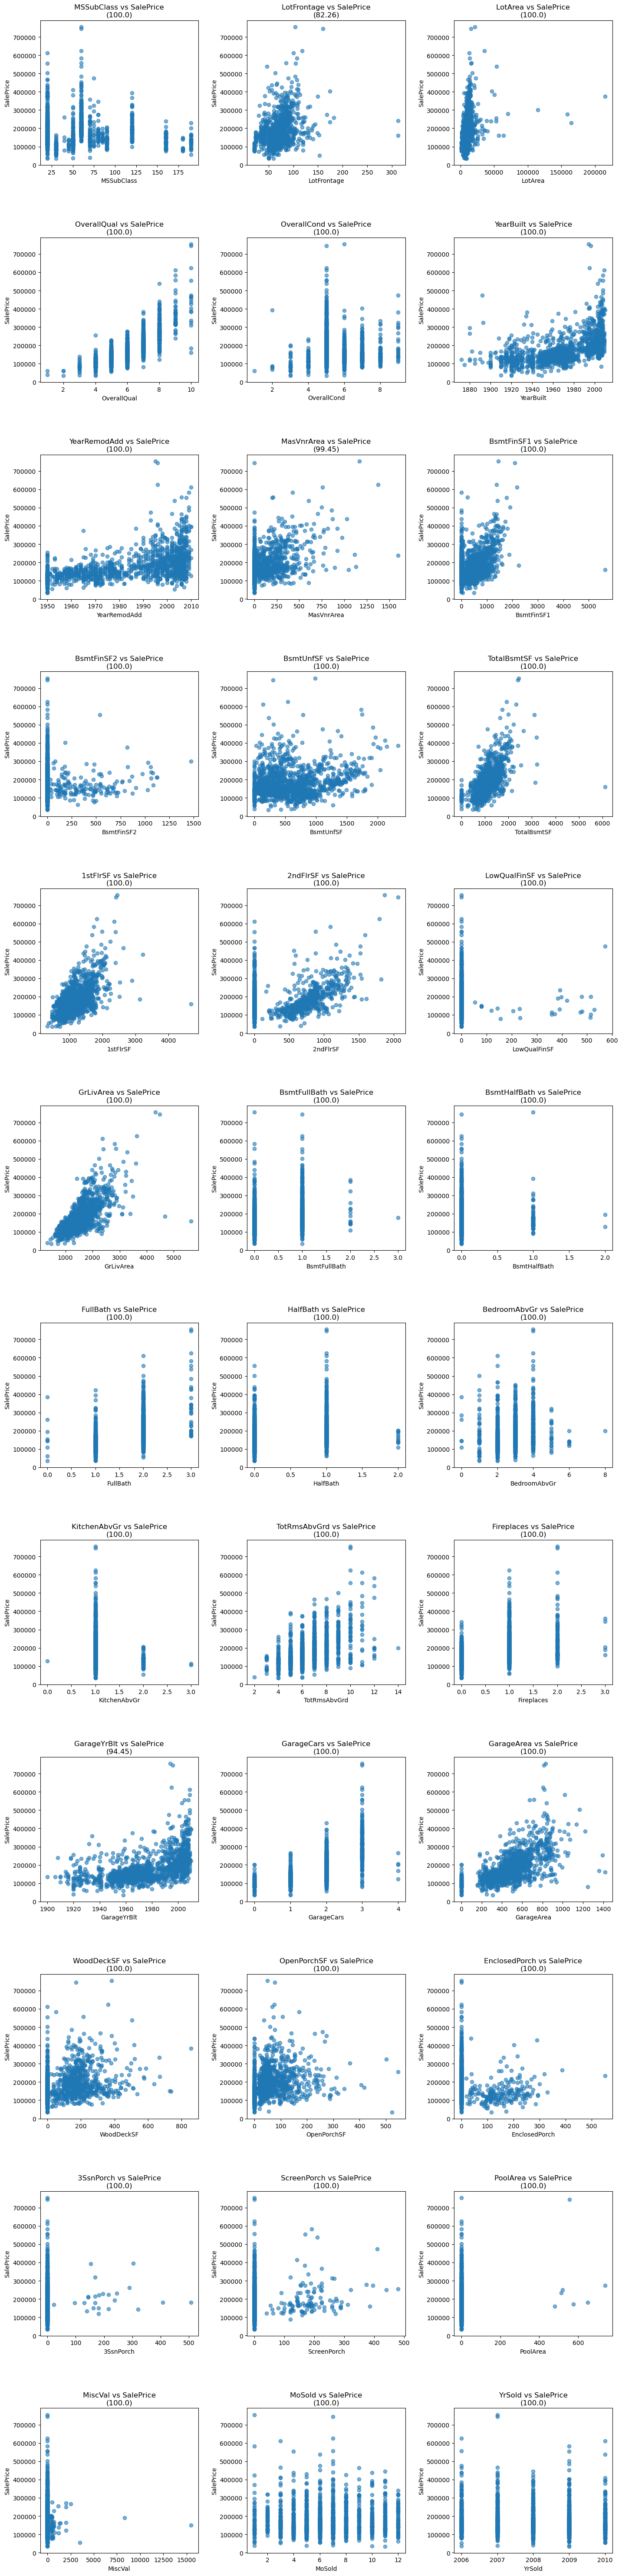

In [20]:
# Configurar los gráficos
num_columns = len(numeric_columns_wo_price)
rows = (num_columns // 3) + (num_columns % 3 > 0)  # Calcular el número de filas necesarias
fig, axes = plt.subplots(rows, 3, figsize=(15, 5 * rows))  # Tamaño del gráfico

# Ajustar para evitar solapamiento
fig.tight_layout(pad=5.0)

# Total de filas en el dataset
total_rows = len(data)

# Generar los scatter plots
for i, column in enumerate(numeric_columns_wo_price):
    row = i // 3
    col = i % 3
    ax = axes[row, col] if rows > 1 else axes[col]

    # Contar elementos no nulos
    non_null_count = data[column].notna().sum()

    # Crear el scatter plot
    ax.scatter(data[column], data["SalePrice"], alpha=0.6)
    ax.set_title(f'{column} vs SalePrice\n({round(non_null_count * 100 / total_rows ,2)})')
    ax.set_xlabel(column)
    ax.set_ylabel("SalePrice")

# Ocultar gráficos vacíos si sobran espacios
for j in range(i + 1, rows * 3):
    row = j // 3
    col = j % 3
    ax = axes[row, col] if rows > 1 else axes[col]
    ax.axis("off")

# Mostrar el gráfico con scroll (usando IPython)
plt.subplots_adjust(hspace=0.5)
plt.show()

# LotFrontage remove the max 2
# Lot Area remove max 4
# YearRemolAdd => calc if YearBuild !== YearRemolAdd ? YearSold - YearRemolAdd (!= : 0 ) => RemolSince (plot)

In [15]:
def plotDataFromColumnList(dataset, numeric_columns_list):
    # Configurar los gráficos
    num_columns = len(numeric_columns_list)
    rows = (num_columns // 3) + (num_columns % 3 > 0)  # Calcular el número de filas necesarias
    fig, axes = plt.subplots(rows, 3, figsize=(15, 5 * rows))  # Tamaño del gráfico
    
    # Ajustar para evitar solapamiento
    fig.tight_layout(pad=5.0)
    
    # Total de filas en el dataset
    total_rows = len(dataset)
    
    # Generar los scatter plots
    for i, column in enumerate(numeric_columns_list):
        # Fila del gráfico (filas para gráficos están en posiciones pares, listados en posiciones impares)
        plot_row = (i // 3) * 2
        text_row = plot_row + 1
        col = i % 3
    
        # Ejes para el gráfico
        ax = axes[plot_row, col]
    
        # Calcular z-scores para la columna
        column_zscores = zscore(dataset[column].dropna())  # Ignorar NaN al calcular z-scores
        column_indices = dataset[column].dropna().index  # Índices de valores válidos
    
        # Obtener los 10 valores más extremos
        extreme_indices = column_indices[abs(column_zscores).argsort()[::-1][:10]]
        extreme_values = dataset.loc[extreme_indices, column]
        extreme_zscores = column_zscores[abs(column_zscores).argsort()[::-1][:10]]
    
        # Calcular porcentaje de valores encontrados
        non_null_count = dataset[column].notna().sum()
        percentage = round(non_null_count * 100 / total_rows, 2)
    
        # Crear el scatter plot
        ax.scatter(dataset[column], dataset["SalePrice"], alpha=0.6)
        ax.set_title(f'{column} vs SalePrice\n({round(non_null_count * 100 / total_rows ,2)})')
        ax.set_xlabel(column)
        ax.set_ylabel("SalePrice")
    
        # Ejes para el listado
        ax_text = axes[text_row, col]
        ax_text.axis("off")  # Desactivar los ejes del área de texto
    
        # Mostrar los valores y z-scores en el listado
        text = "\n".join(
            [f"{j + 1}. {val:.2f} (z={z:.2f})" for j, (val, z) in enumerate(zip(extreme_values, extreme_zscores))]
        )
        ax_text.text(0.5, 0.5, text, ha='center', va='center', fontsize=10)
    
    # Ocultar gráficos vacíos si sobran espacios
    for j in range(i + 1, rows * 3):
        ax = axes[(j // 3) * 2, j % 3]
        ax.axis("off")
        ax_text = axes[((j // 3) * 2) + 1, j % 3]
        ax_text.axis("off")
    
    # Mostrar el gráfico con scroll (usando IPython)
    plt.subplots_adjust(hspace=0.8)
    plt.show()

In [16]:
data_train = data.copy()

In [128]:
def add_features(dataset):
    dataset['houseAge'] = dataset['YrSold'] - dataset['YearBuilt']
    dataset['houseRemodAge'] = dataset['YrSold'] - dataset['YearRemodAdd']
    #dataset['garageAge'] = dataset['YrSold'] - dataset['GarageYrBlt']
    dataset['totalBaths'] = dataset['BsmtFullBath'] + dataset['FullBath'] + 0.5* (dataset['HalfBath'] + dataset['BsmtHalfBath'])
    dataset['porchDeckArea'] = dataset['WoodDeckSF'] + dataset['OpenPorchSF'] + dataset['EnclosedPorch'] + dataset['3SsnPorch'] + dataset['ScreenPorch']
    #dataset['totalFinArea'] = dataset['BsmtFinSF1'] + dataset['BsmtFinSF2'] + dataset['1stFlrSF'] + dataset['2ndFlrSF']
    dataset['totalCoveredArea'] = dataset['GrLivArea'] + dataset['TotalBsmtSF']

    return dataset

In [115]:
def drop_features(dataset):
    #drop columns used in add_features
    dataset = dataset.drop(columns=['Id','YrSold','YearBuilt','YearRemodAdd','BsmtFullBath',
                                   'FullBath','HalfBath','BsmtHalfBath','WoodDeckSF',
                                   'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch',
                                    'BsmtFinSF1','BsmtFinSF2','1stFlrSF','2ndFlrSF','GrLivArea',
                                   'TotalBsmtSF','GarageYrBlt','GarageArea'])
    #drop columns no-representatives

    return dataset

In [58]:
def feature_engineering(dataset):
    dataset_final = dataset.copy()
    dataset_final = add_features(dataset_final)
    dataset_final = drop_features(dataset_final)
    
    return dataset_final

In [129]:
data_train = feature_engineering(data)

In [65]:
getDatasetNumericColumns(data_train)

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtUnfSF',
 'LowQualFinSF',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'SalePrice',
 'houseAge',
 'houseRemodAge',
 'garageAge',
 'totalBaths',
 'porchDeckArea',
 'totalFinArea',
 'totalCoveredArea']

In [130]:
#plot_corr_heatmap(data_train[['totalFinArea', 'totalCoveredArea','SalePrice']], True, False, 0.5)
#plot_corr_heatmap(data_train[['GarageArea', 'GarageCars','SalePrice']], True, False, 0.5)

#Sinze both GarageArea and GarageCars have similar correlation with SalePrice, and both are always informed
# we'll drop GarageArea and keep GarageCars due to it's categorical value

KeyError: "['totalFinArea'] not in index"

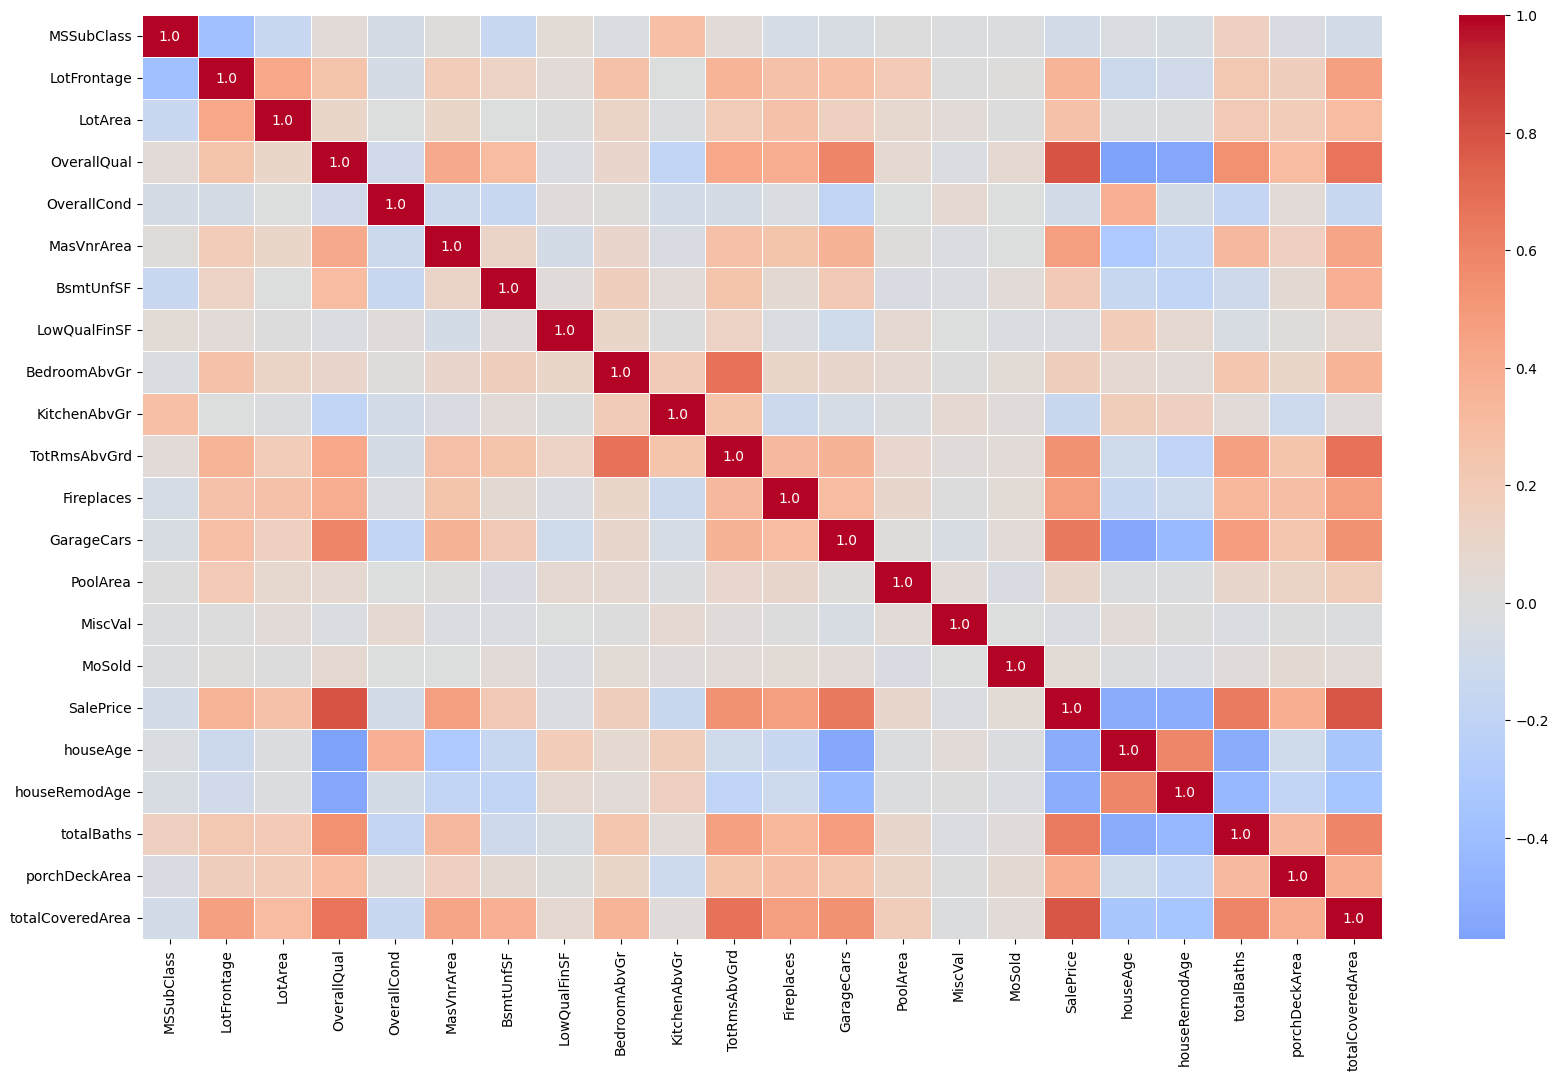

In [131]:
plot_corr_heatmap(data_train, True, True, 0.8)

#Drop GarageArea and GarageCars (mirar si están informado siempre simultanemente)

In [113]:
# Get relation between two values
both_missing = data_train[['GarageArea', 'GarageCars']].isna().all(axis=1).sum()
one_missing = data_train[['GarageArea', 'GarageCars']].isna().any(axis=1).sum()
    
print(f"Registros con ambas columnas faltantes: {both_missing}")
print(f"Registros con una de las columnas faltante: {one_missing}")    

Registros con ambas columnas faltantes: 0
Registros con una de las columnas faltante: 0


In [110]:
def plot_corr_heatmap(_data, annot=False, full_size=False, corr_threshold = None):
    if full_size:
        plt.figure(figsize=(20,12))
    # Only numeric columns are selected
    numeric_data = _data.select_dtypes(include=["number"])
    correlation_matrix = numeric_data.corr()
    
    annot_data = annot
    if annot and corr_threshold:
        annot_mask = correlation_matrix.abs() >= corr_threshold
        annot_data = np.where(annot_mask, correlation_matrix.round(2), "")
    
    sns.heatmap(
        correlation_matrix, 
        annot=annot_data if annot else False, 
        center=0, 
        cmap="coolwarm", 
        fmt="s",
        linewidth=.5 
    )
    #plt.show()

In [138]:
#Let's analize those columns with null values
pd.DataFrame(data_train.isnull().sum().sort_values(ascending=False)).head(18)

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageFinish,81
GarageCond,81
GarageType,81


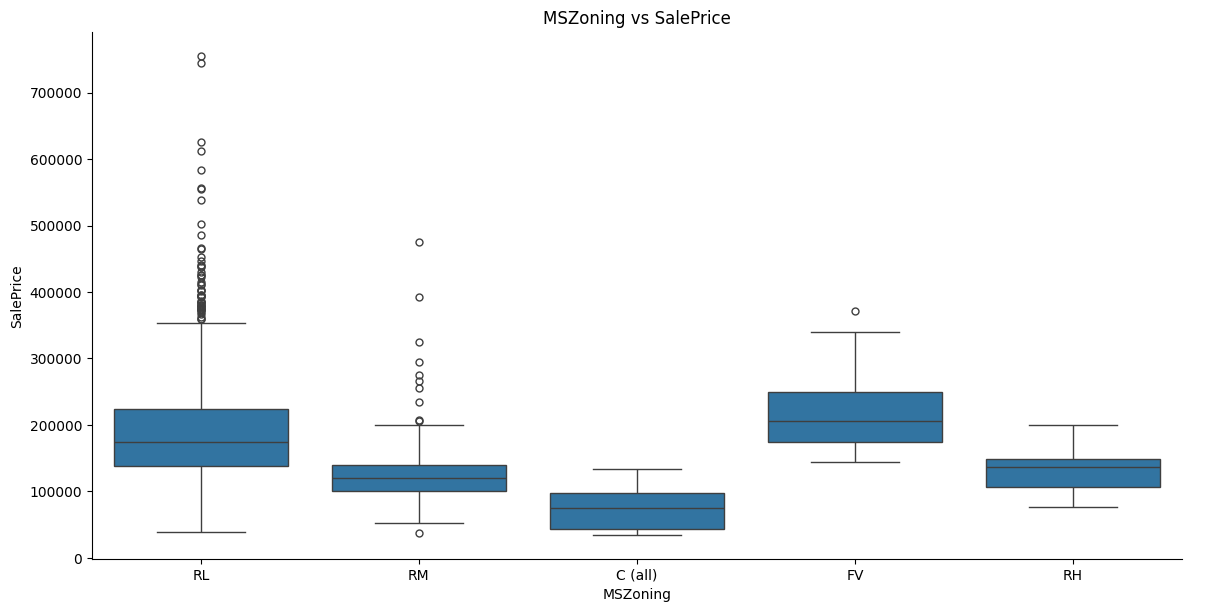

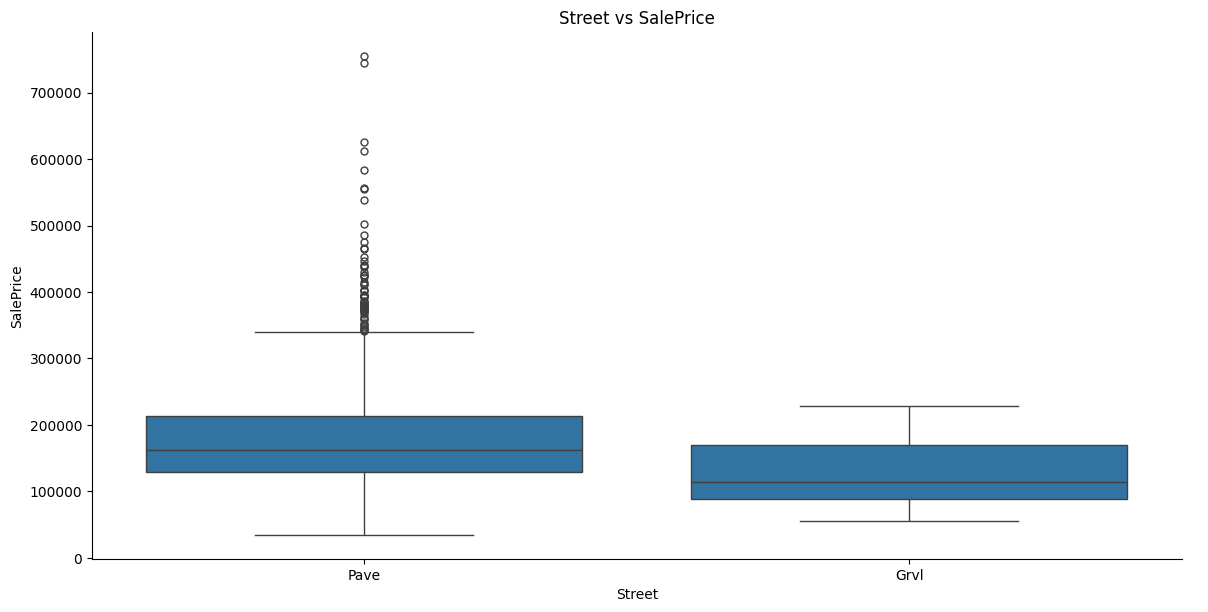

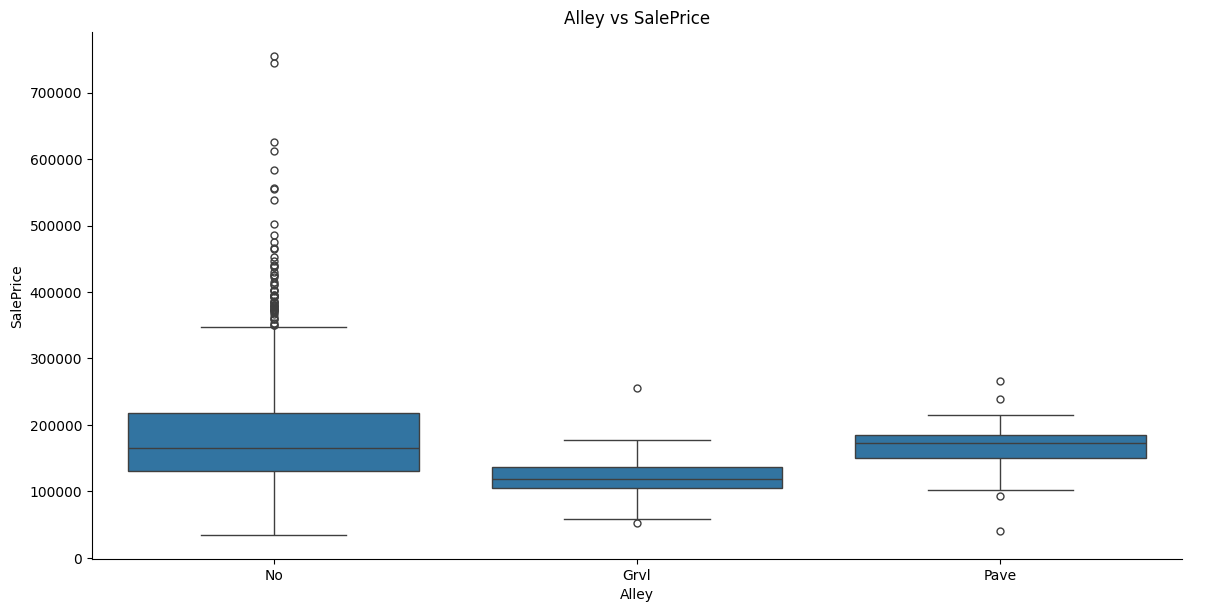

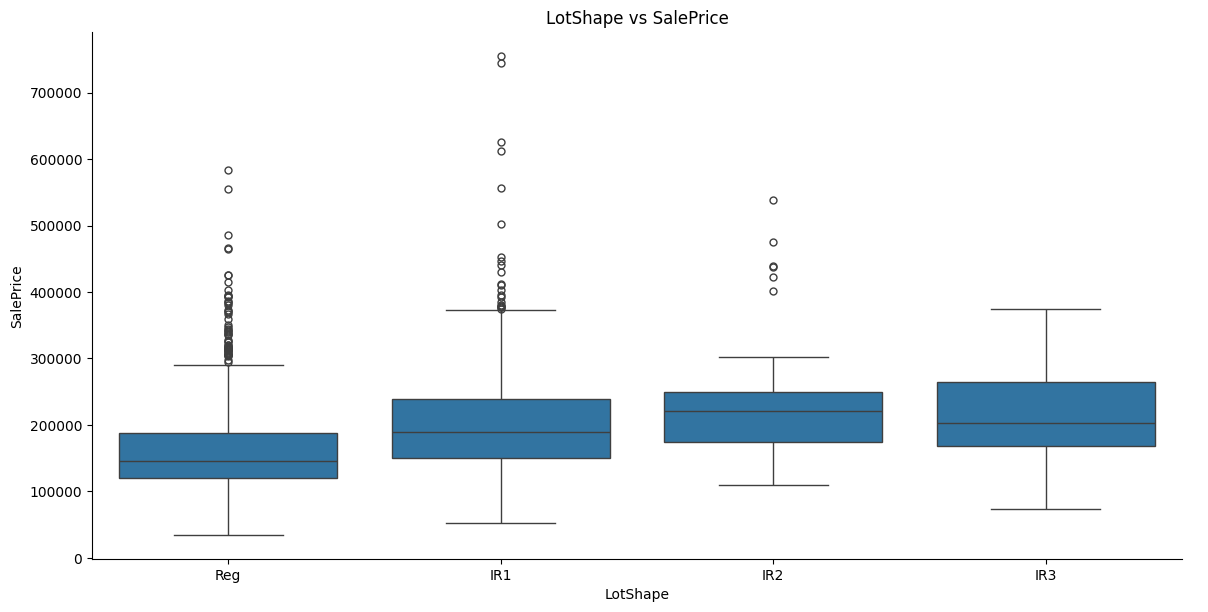

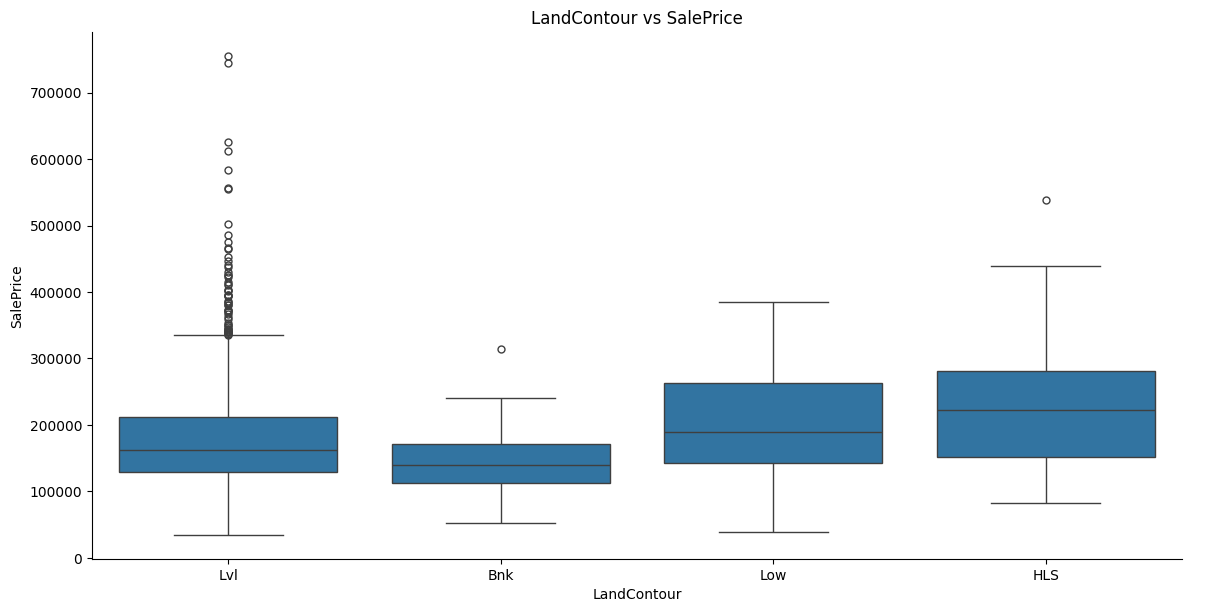

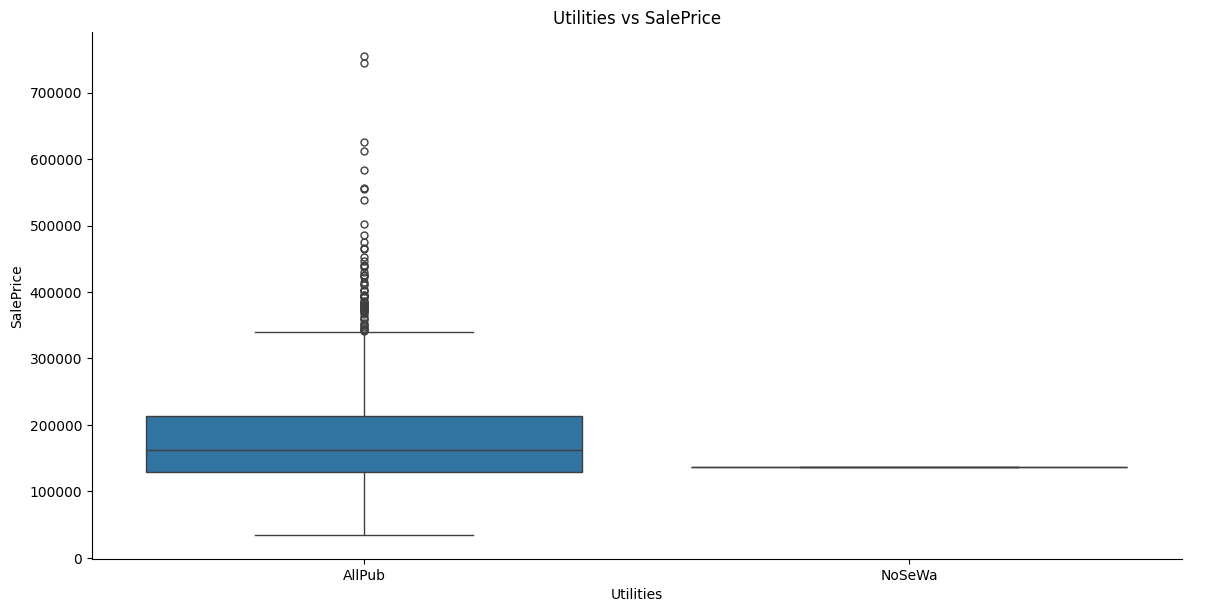

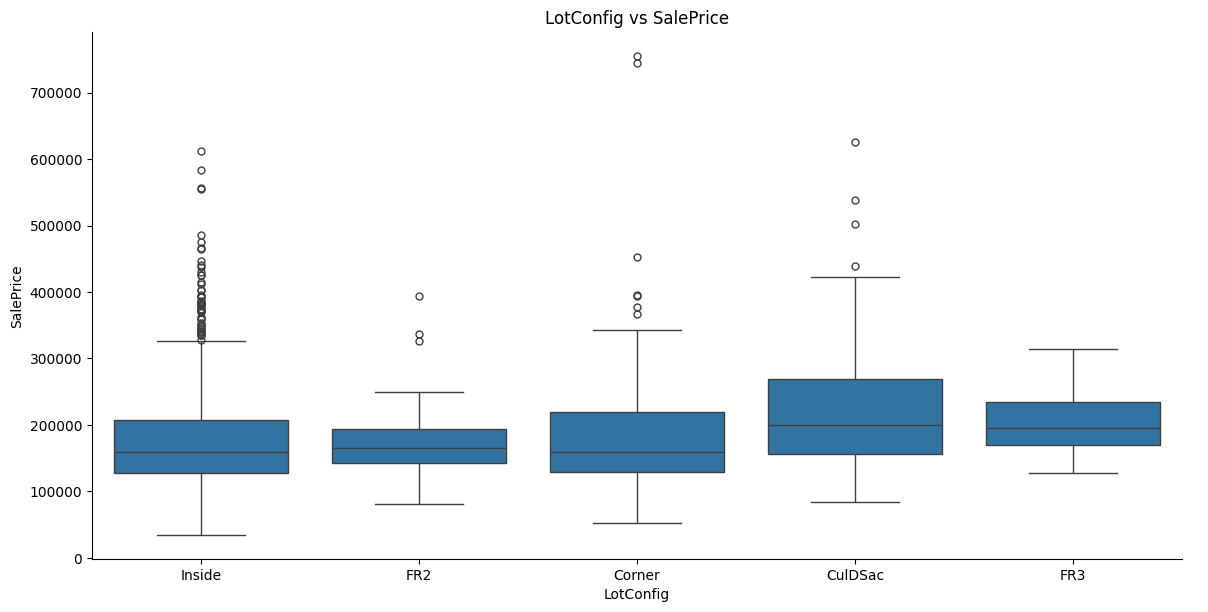

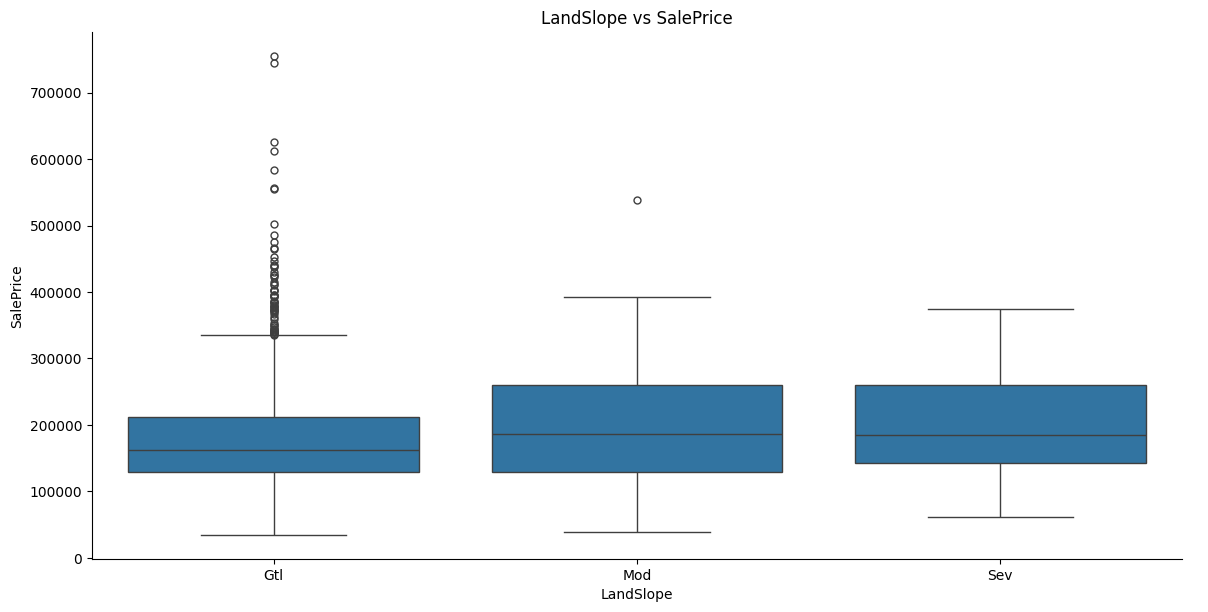

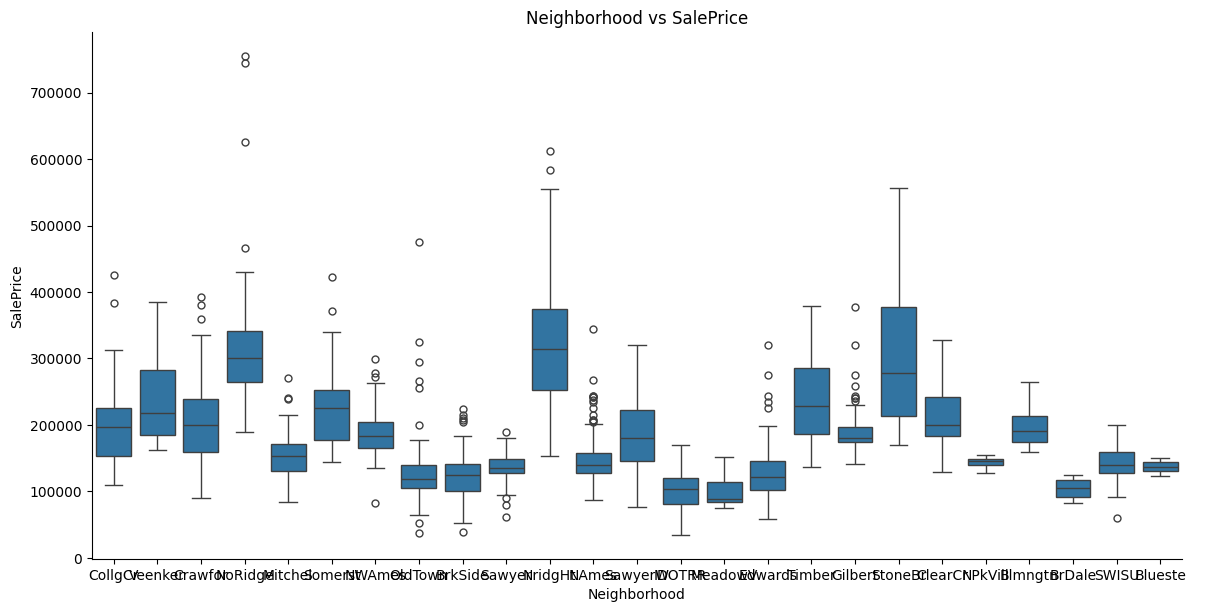

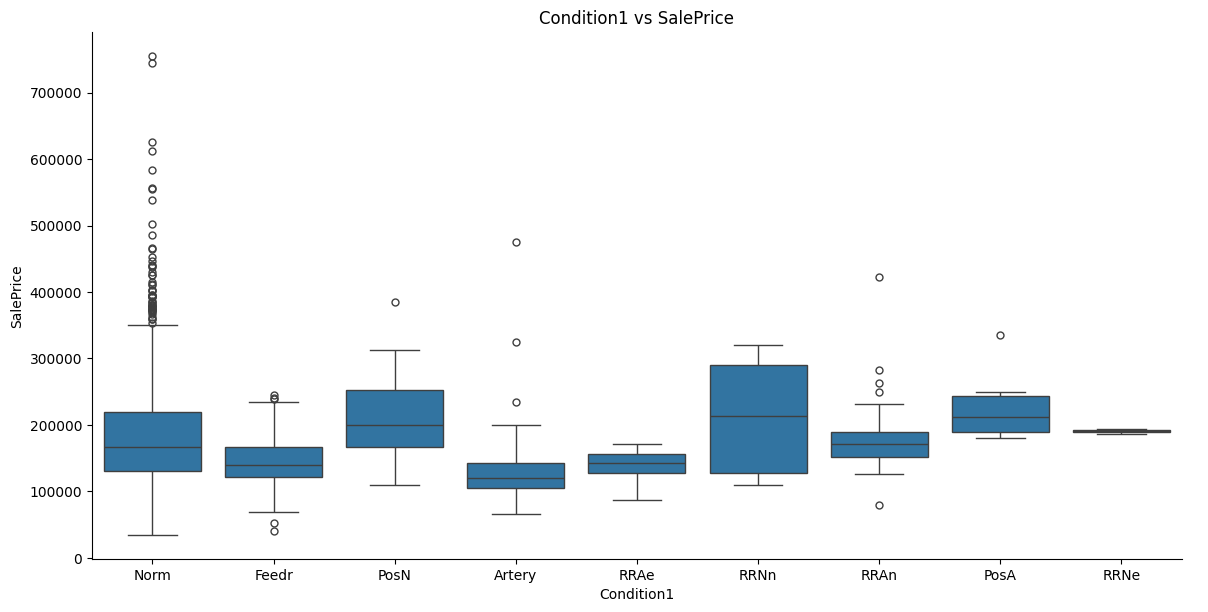

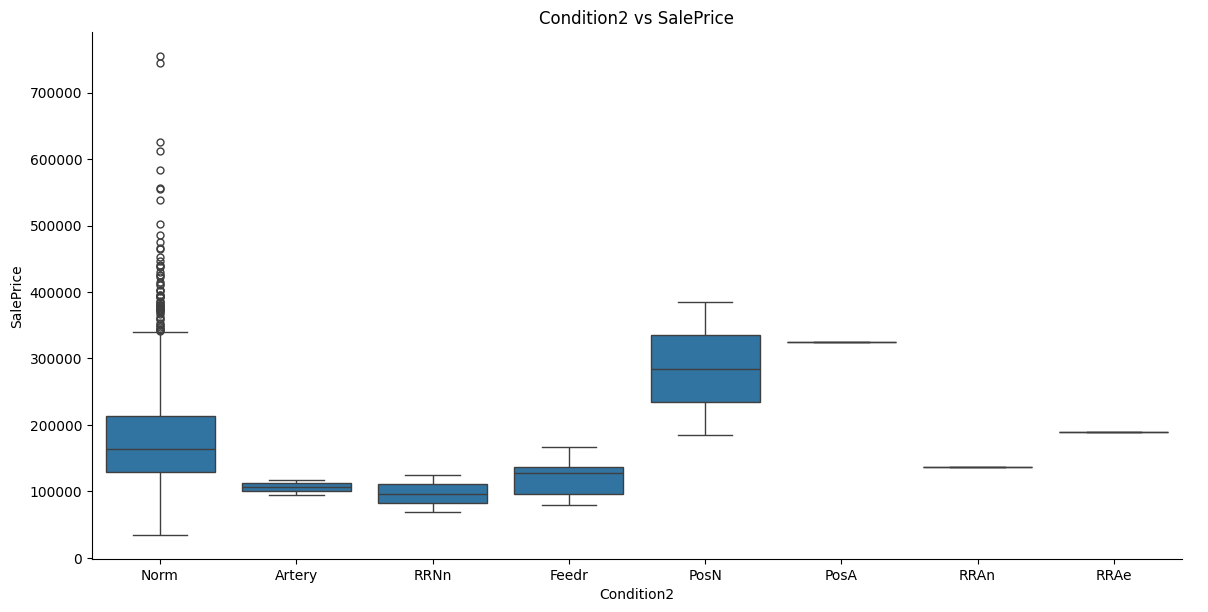

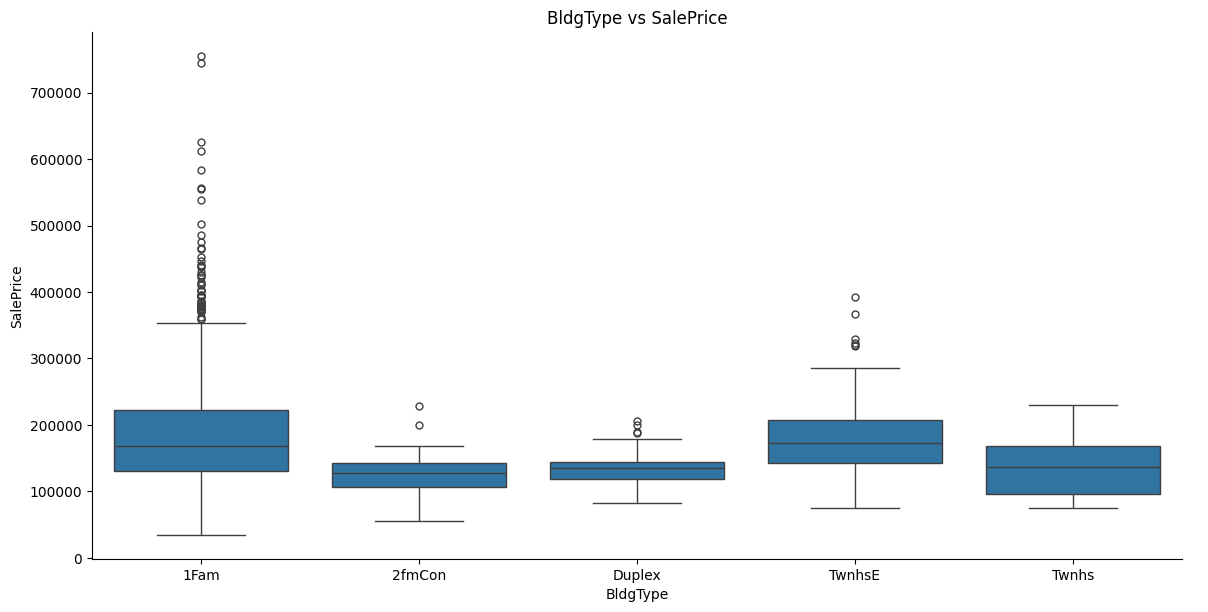

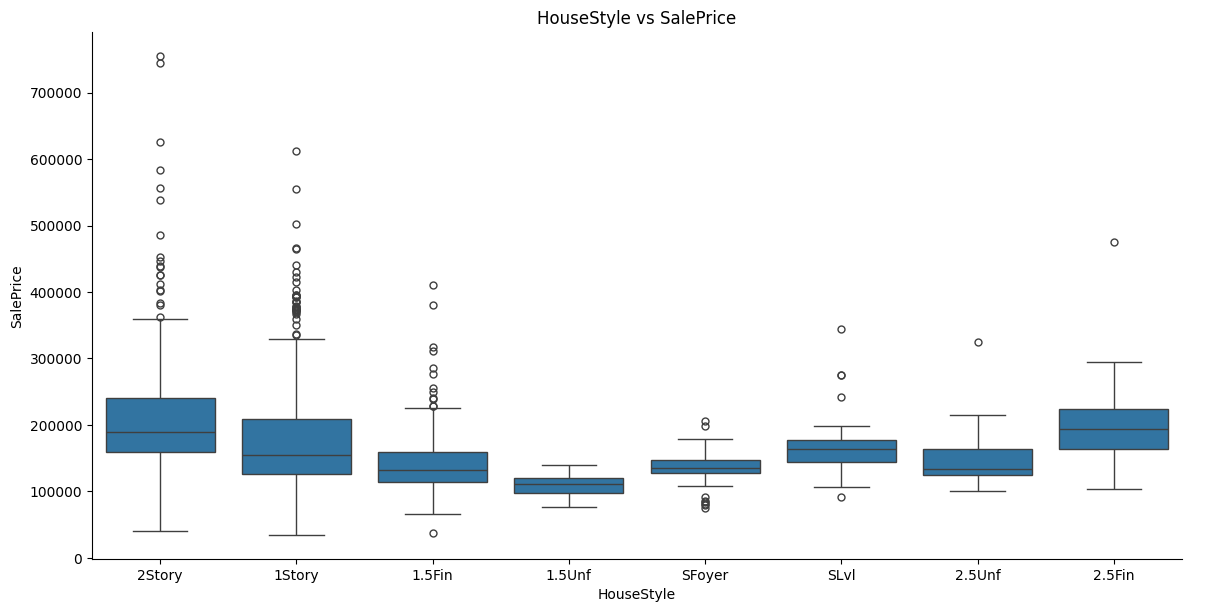

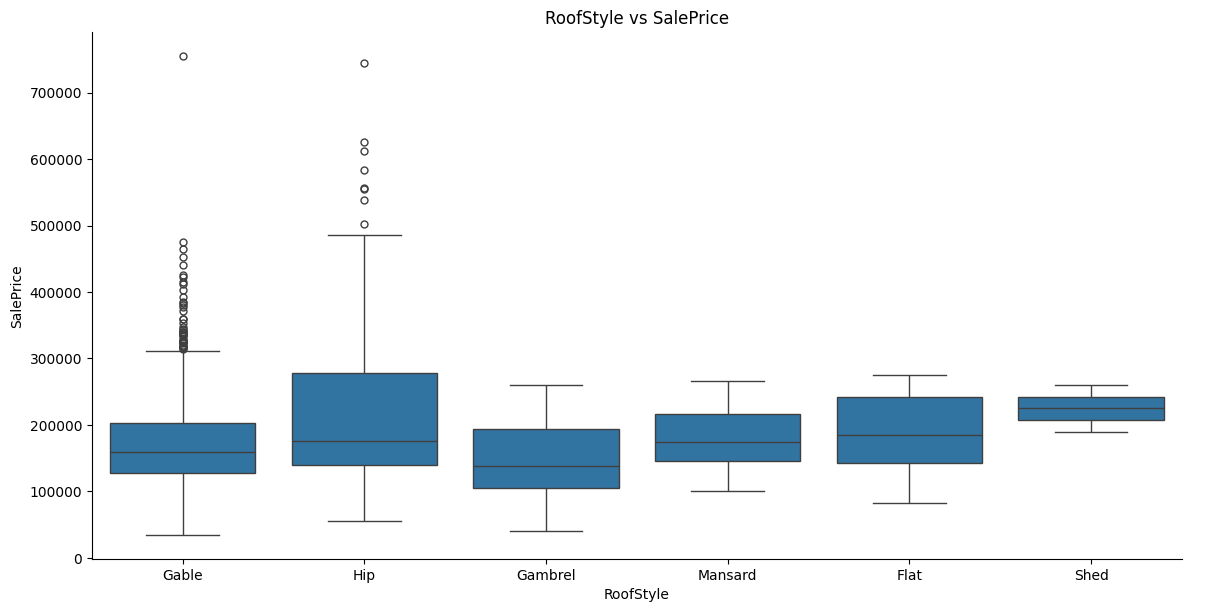

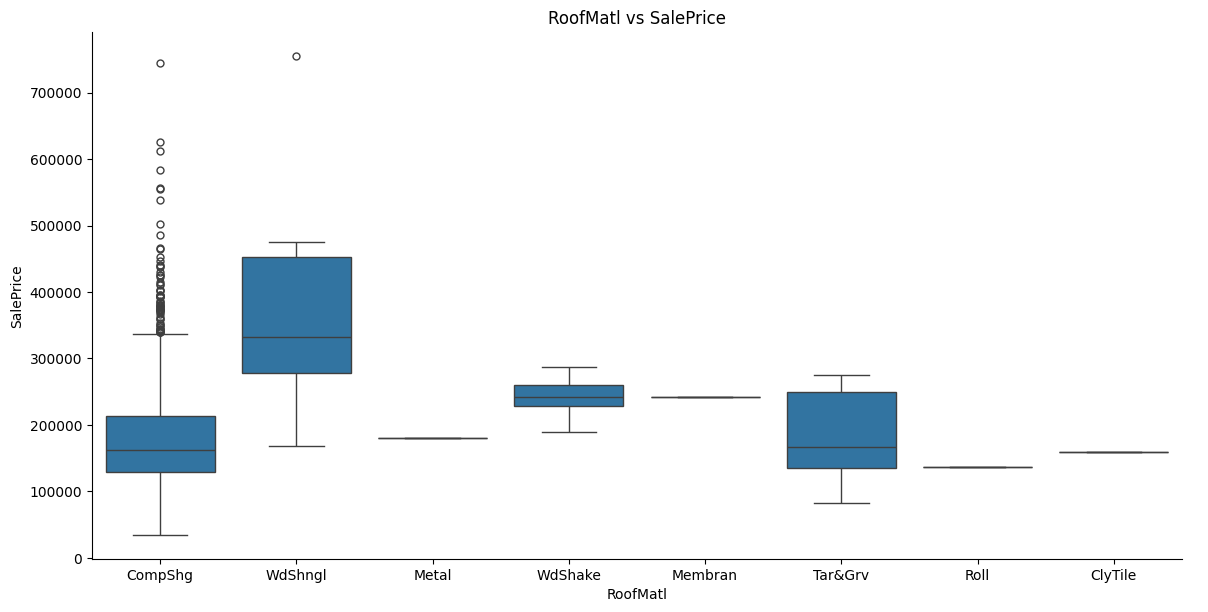

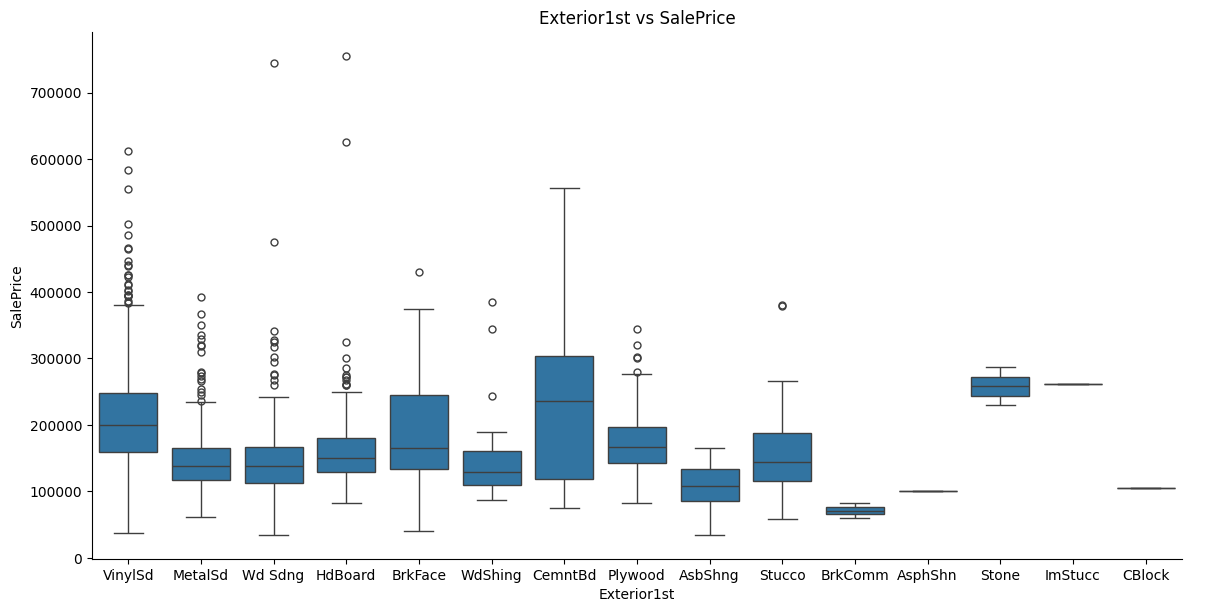

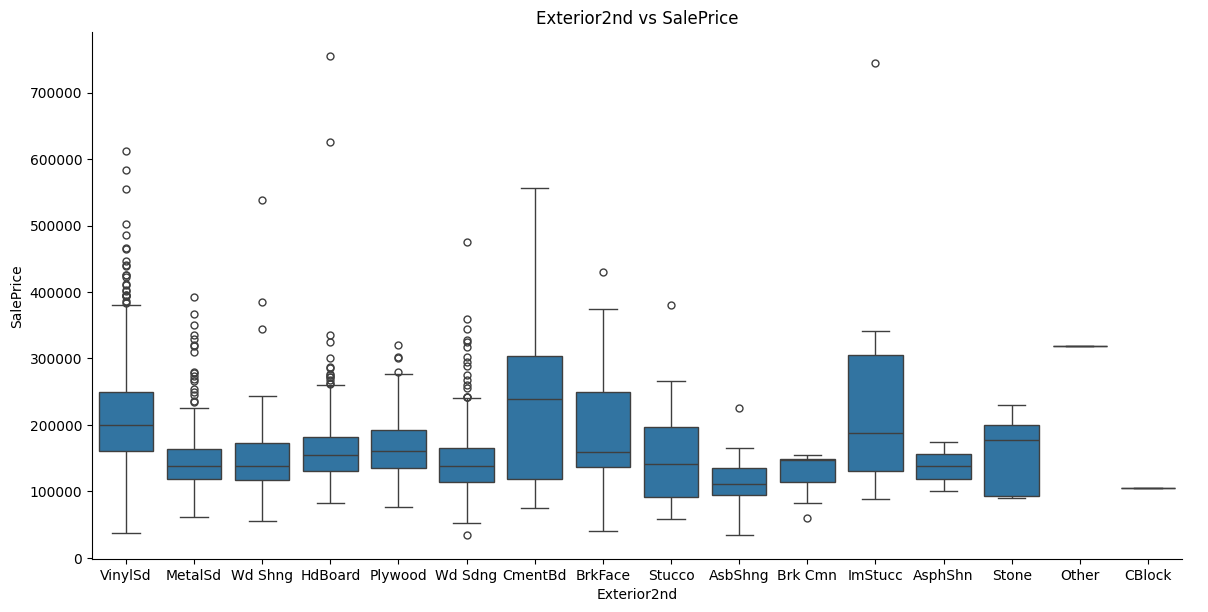

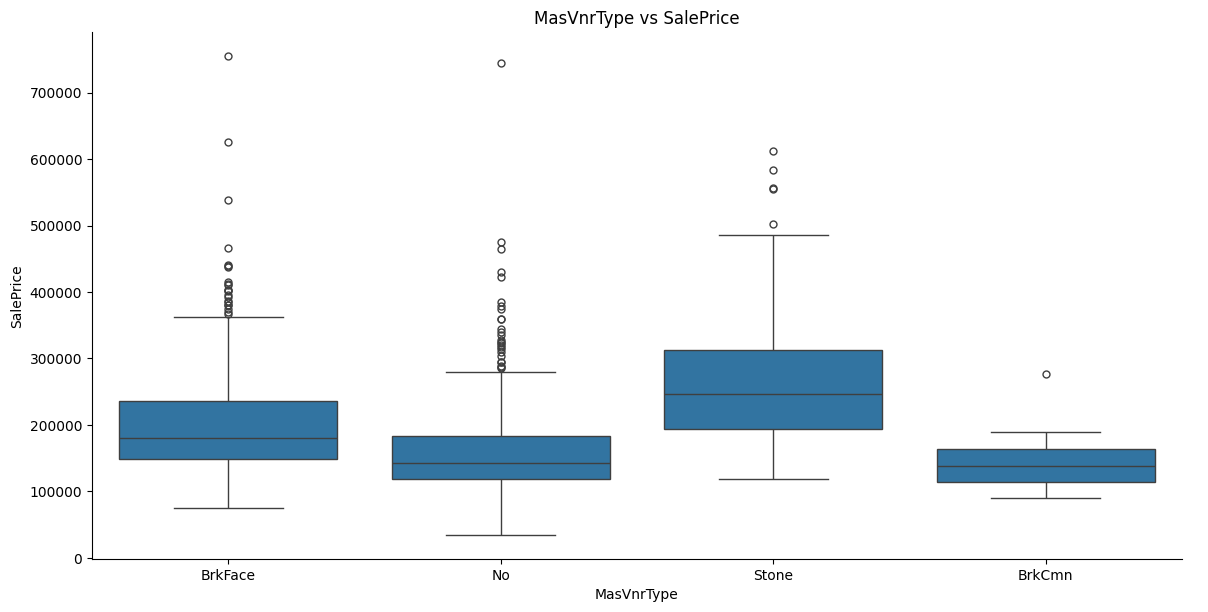

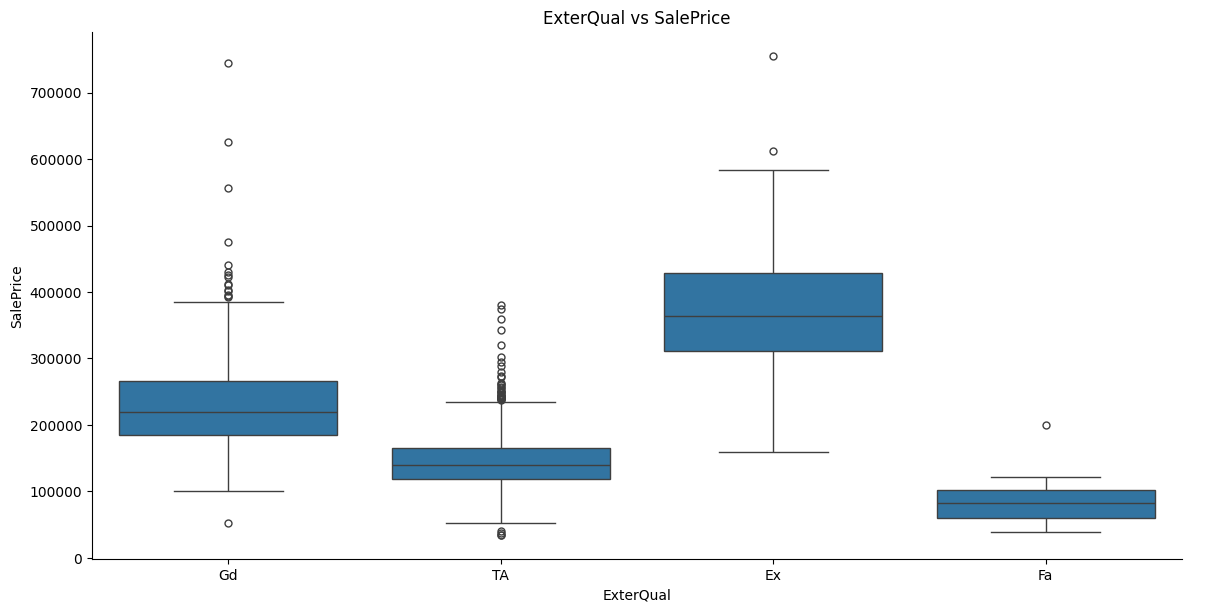

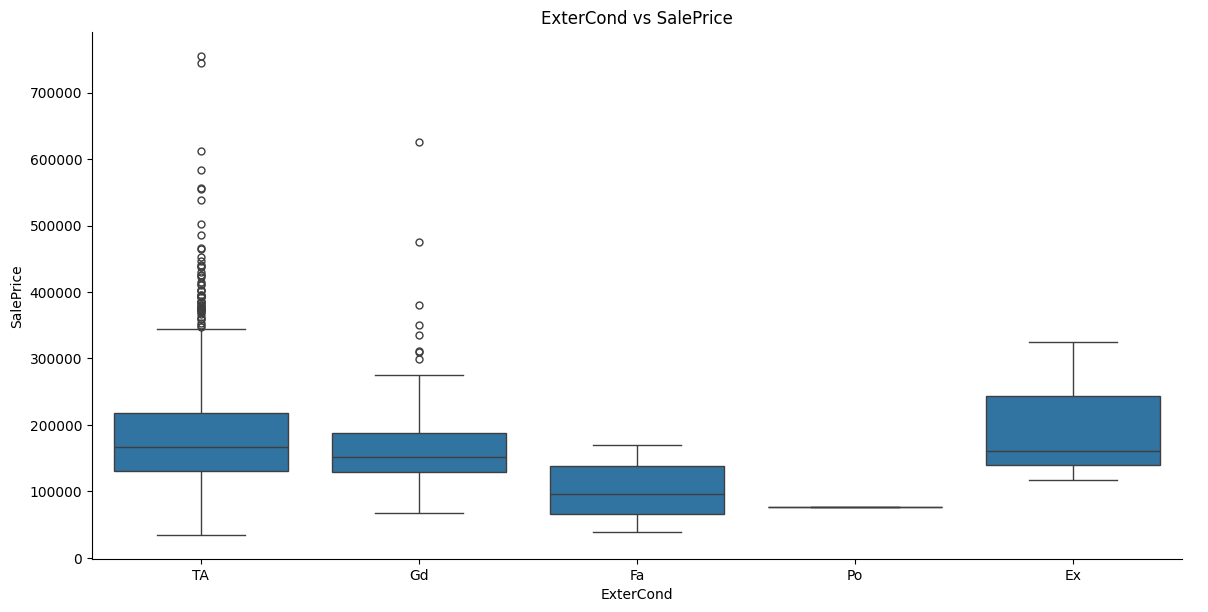

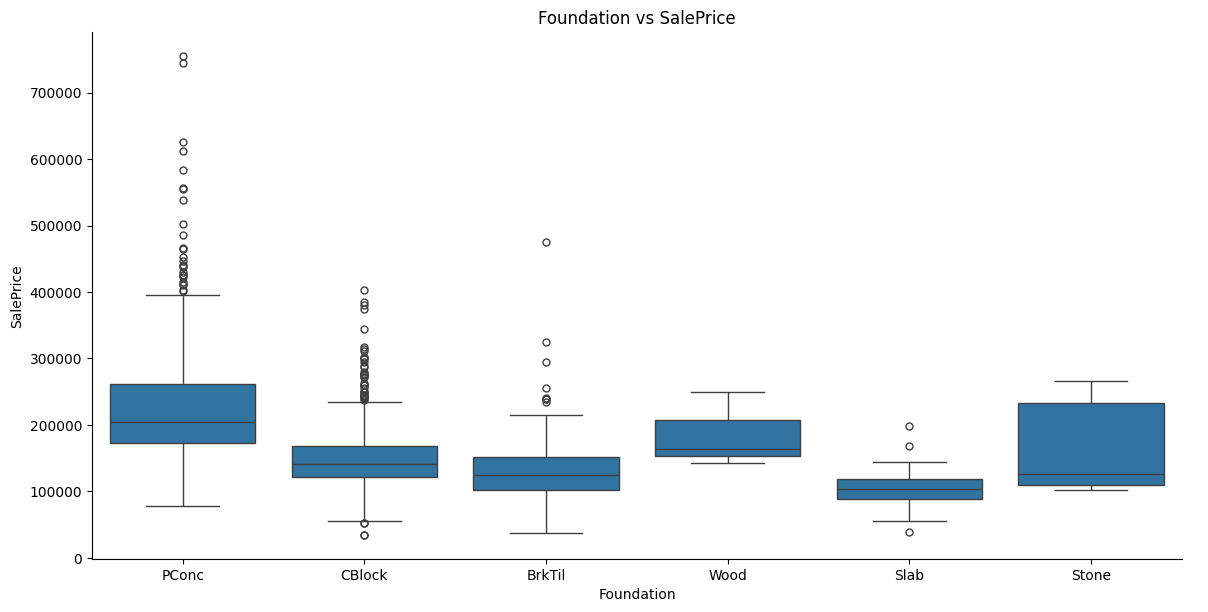

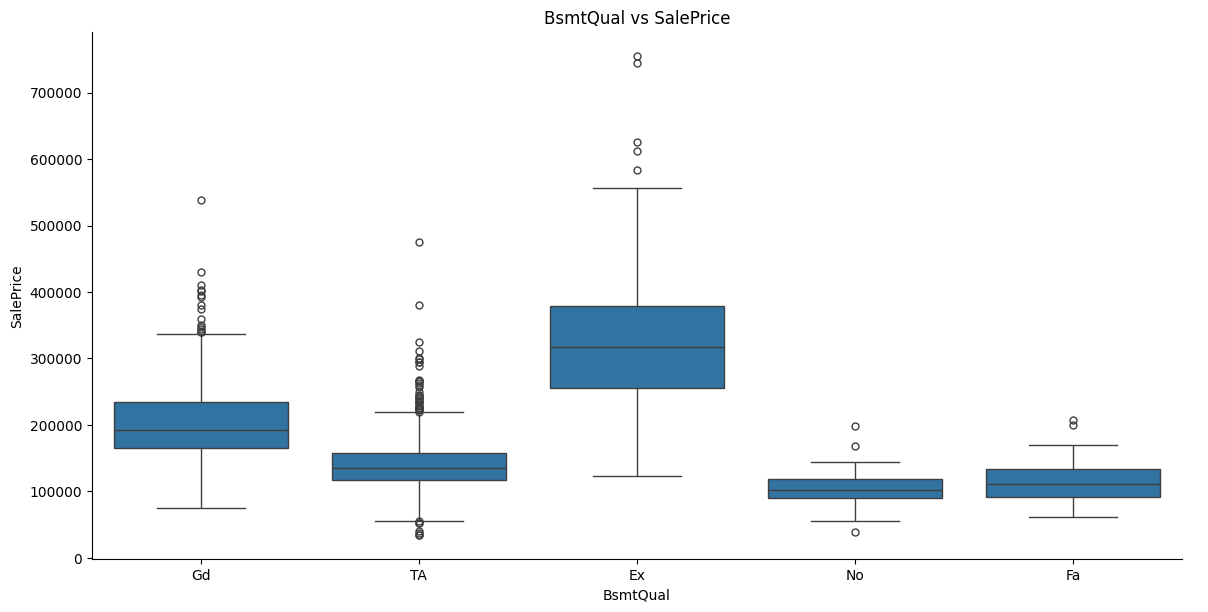

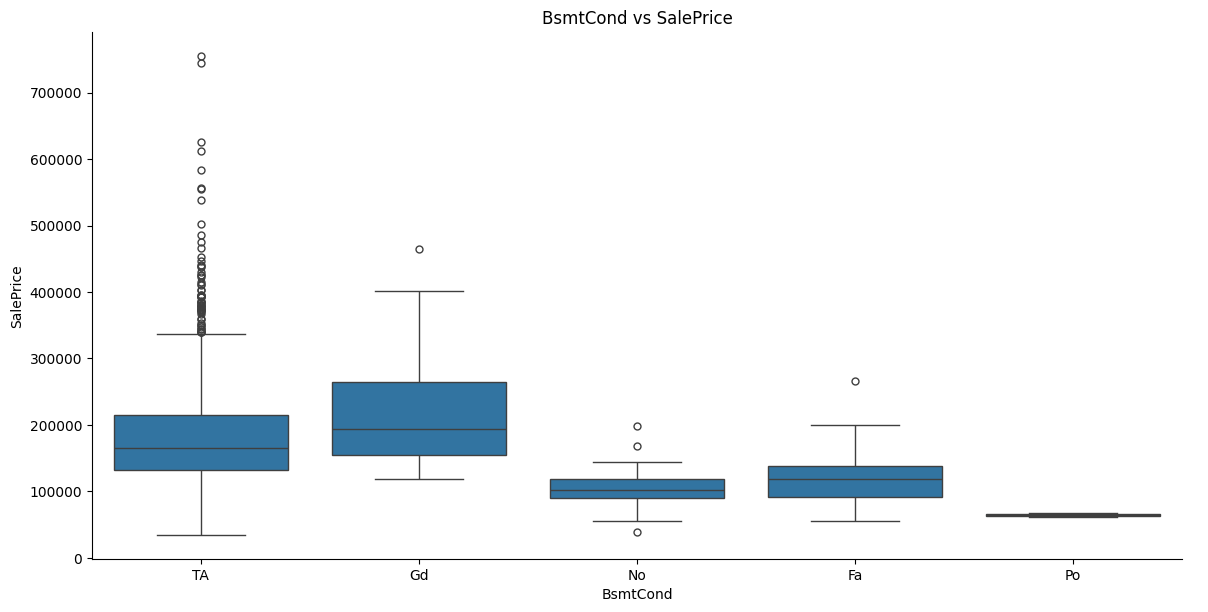

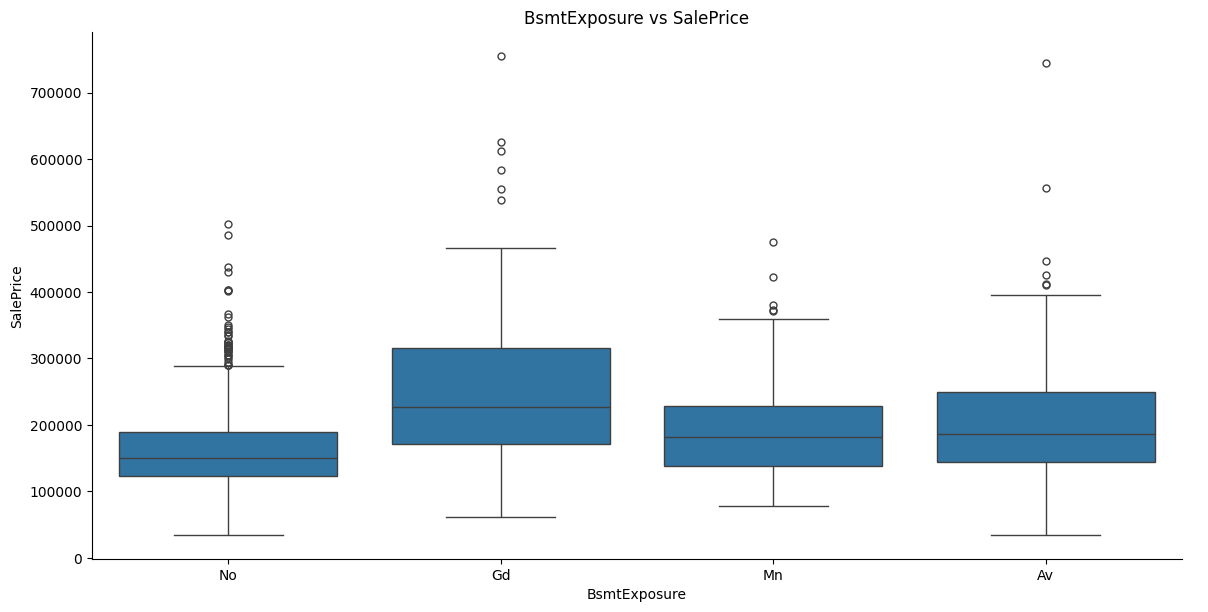

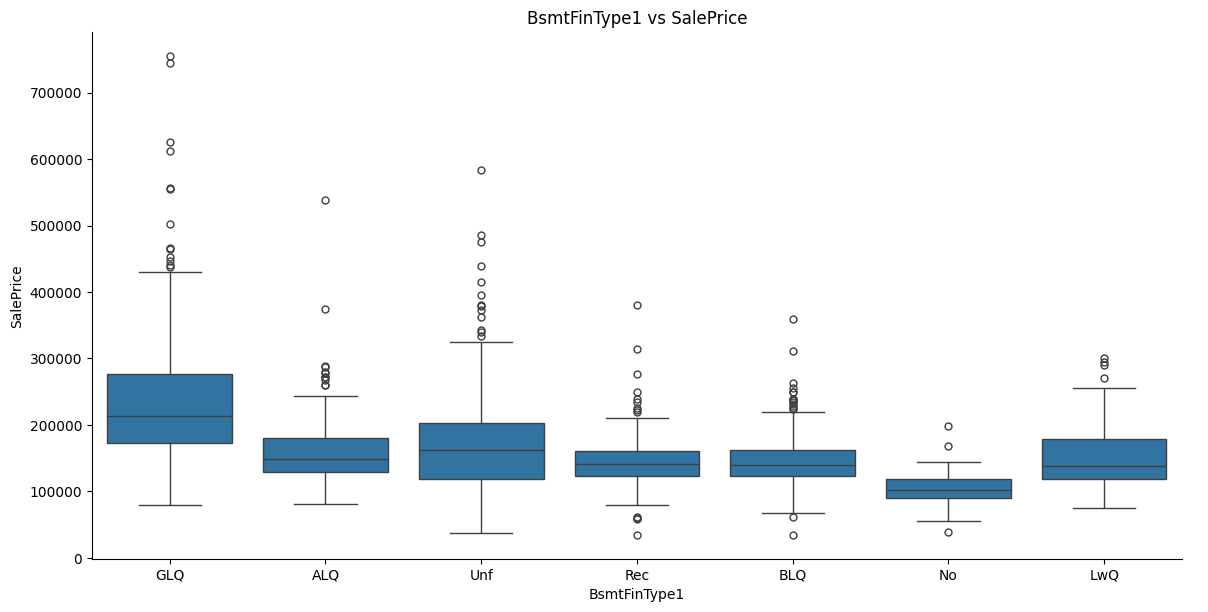

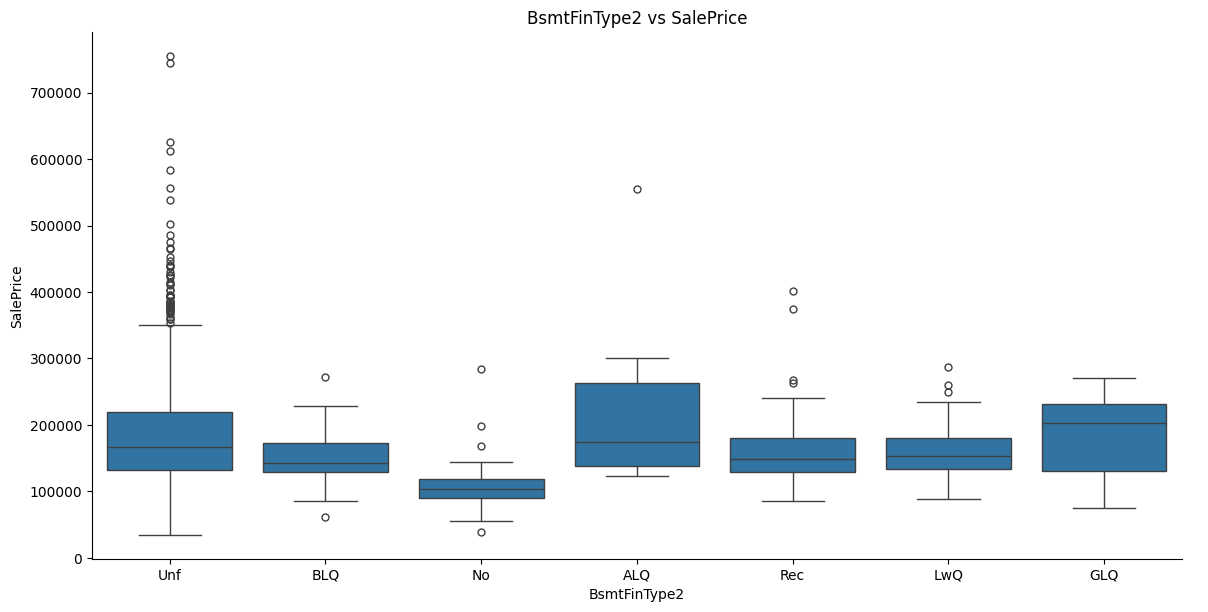

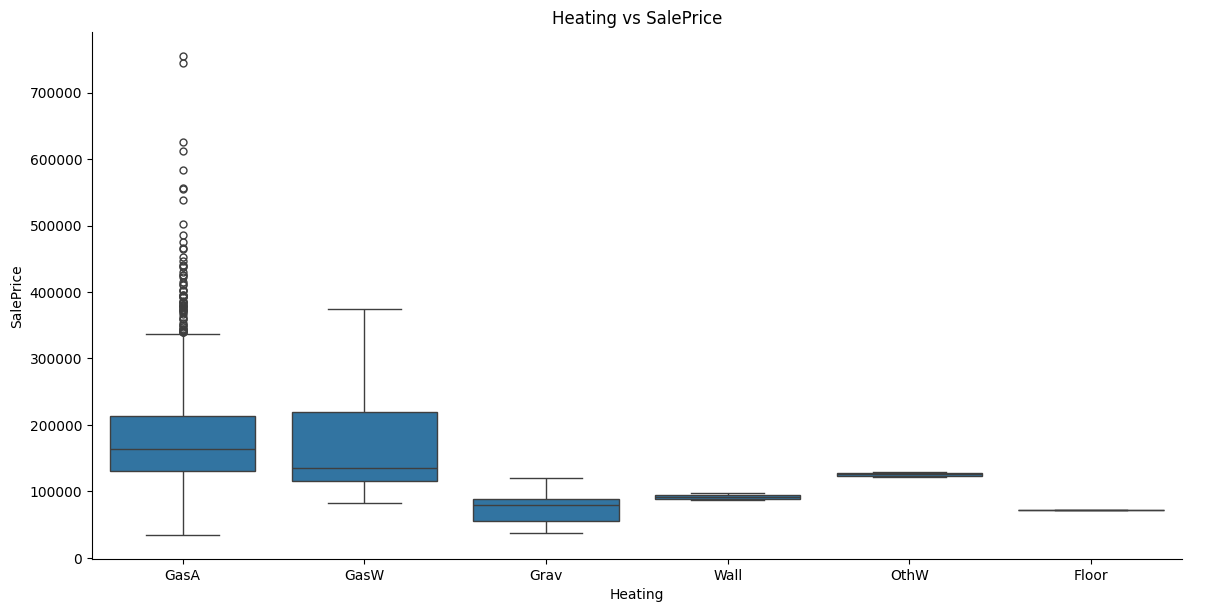

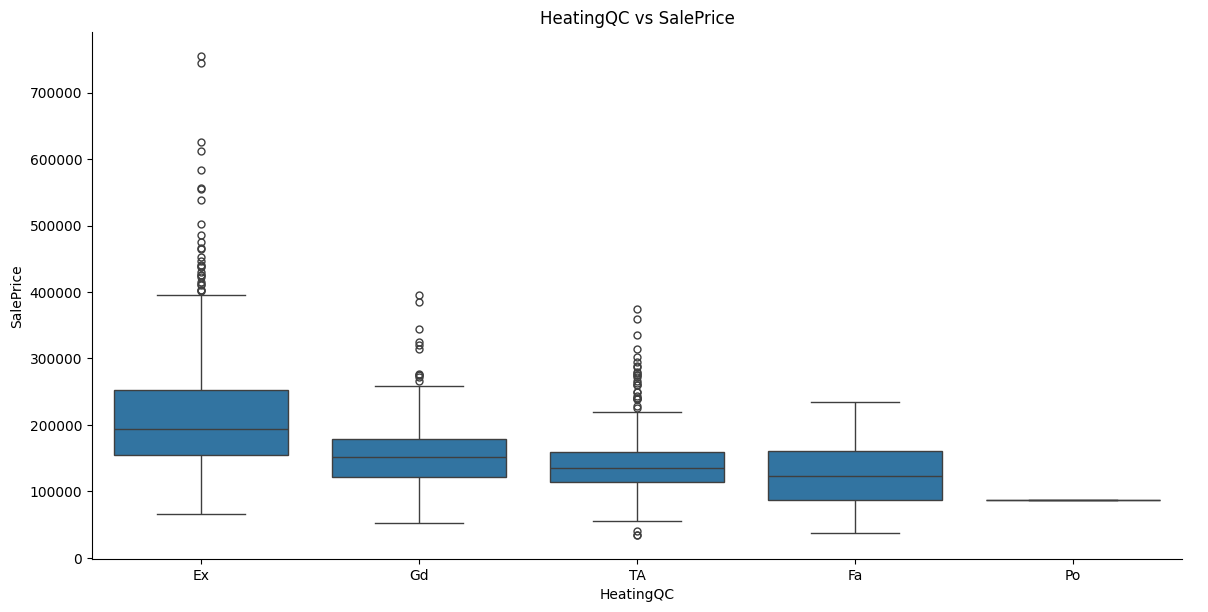

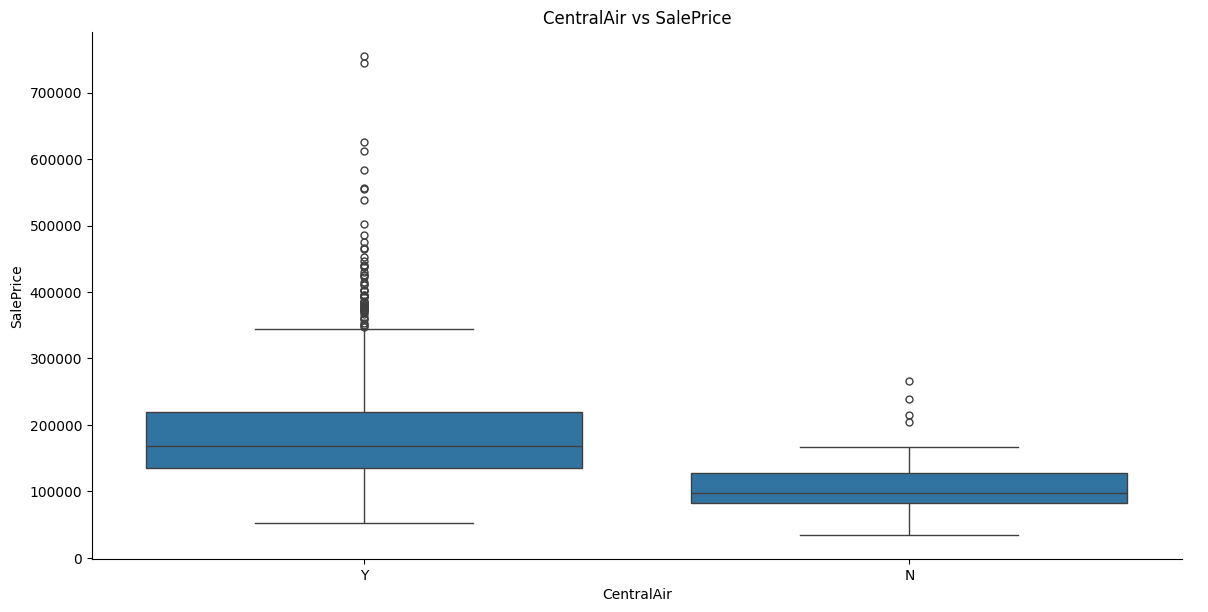

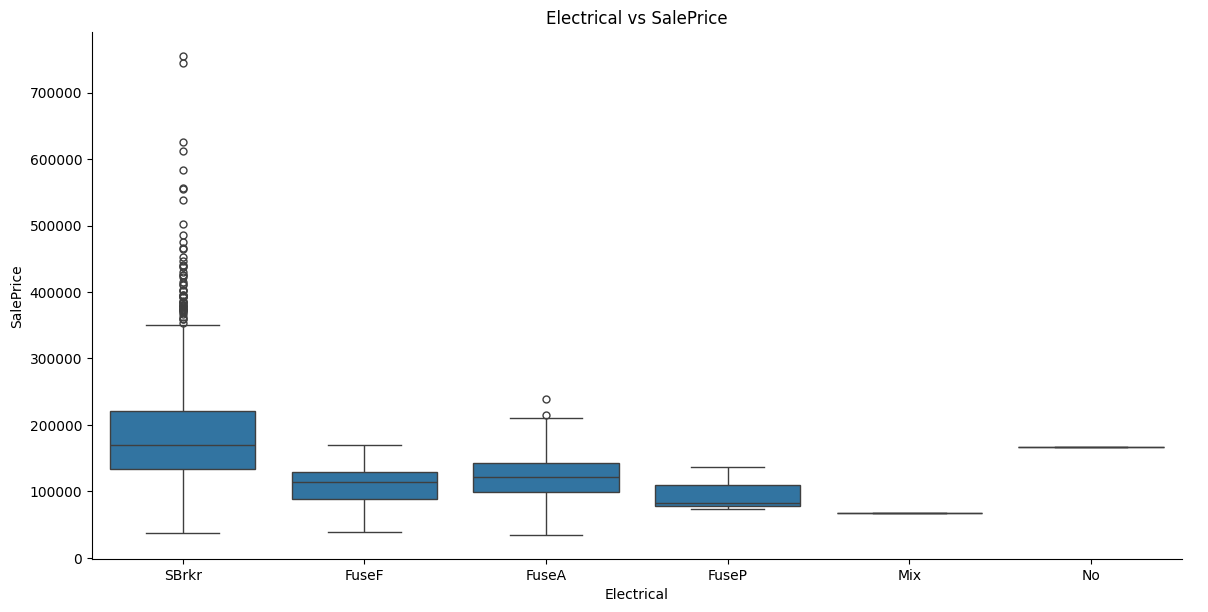

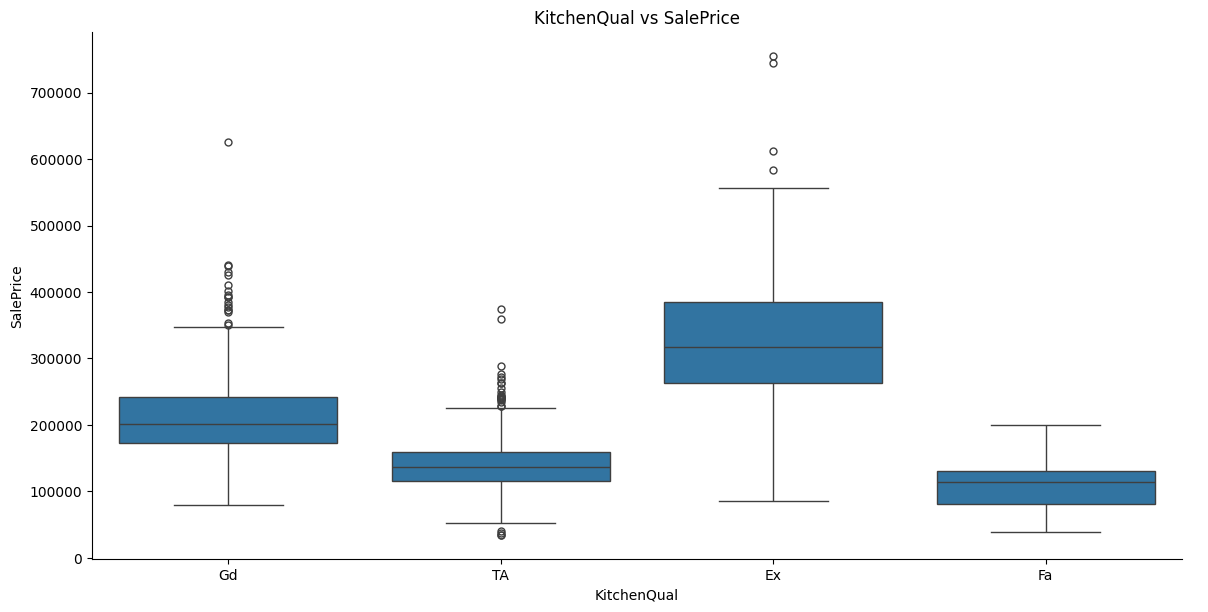

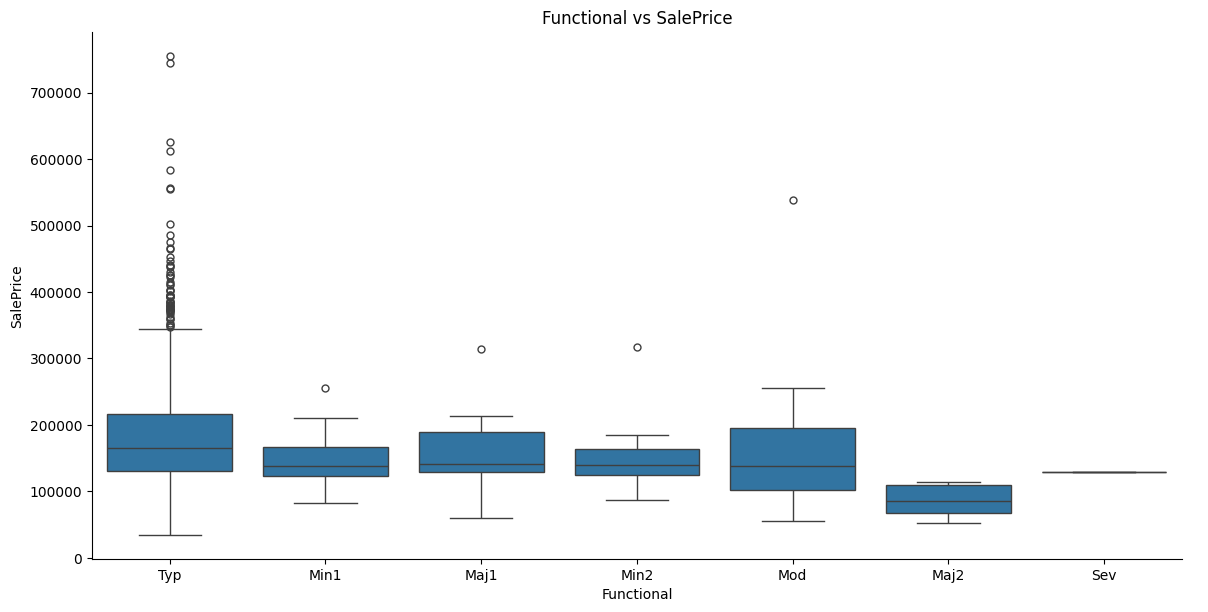

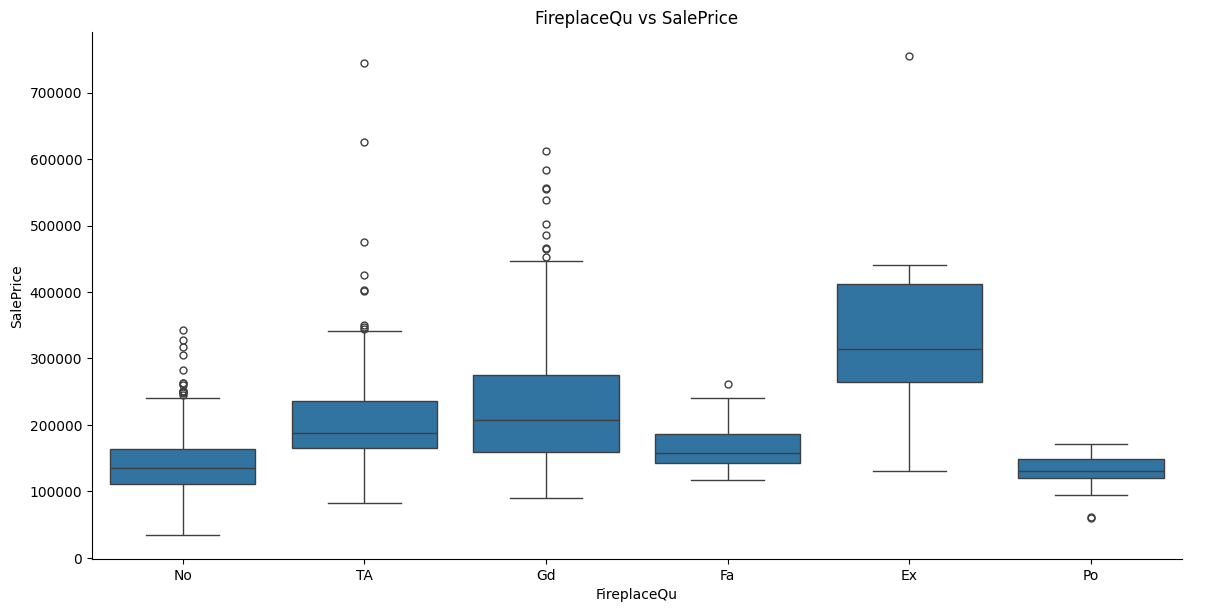

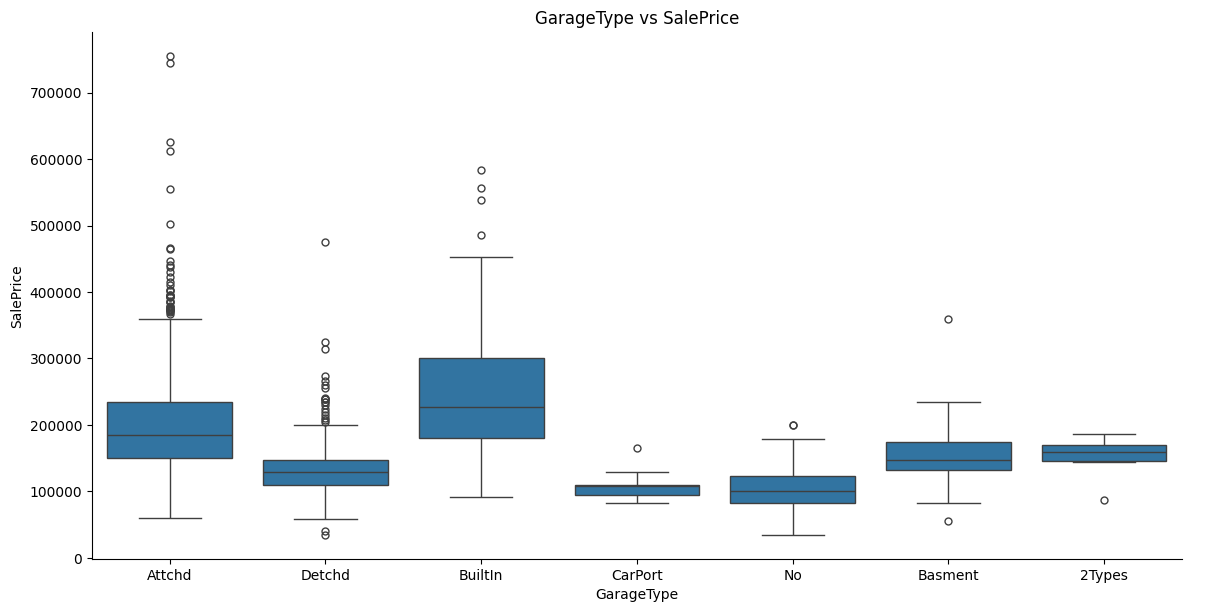

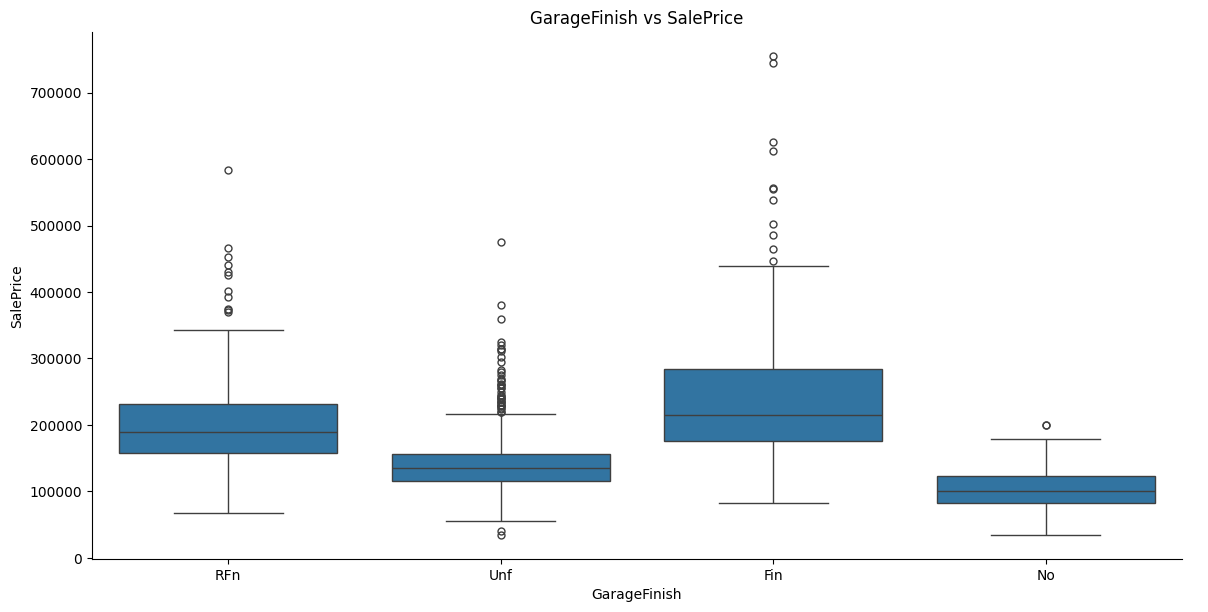

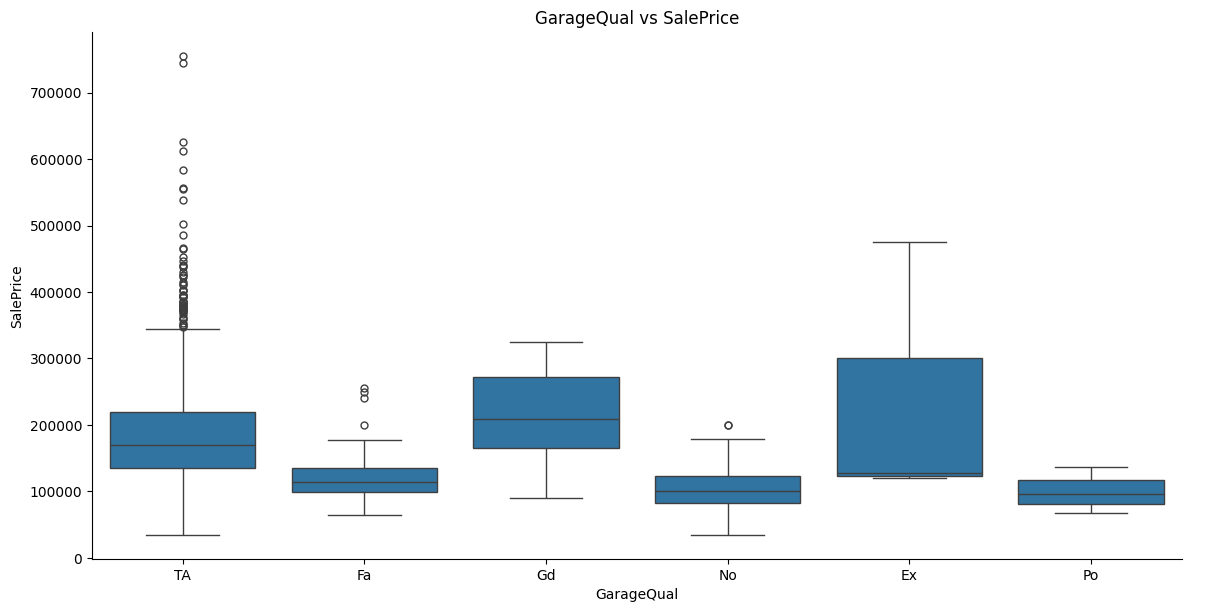

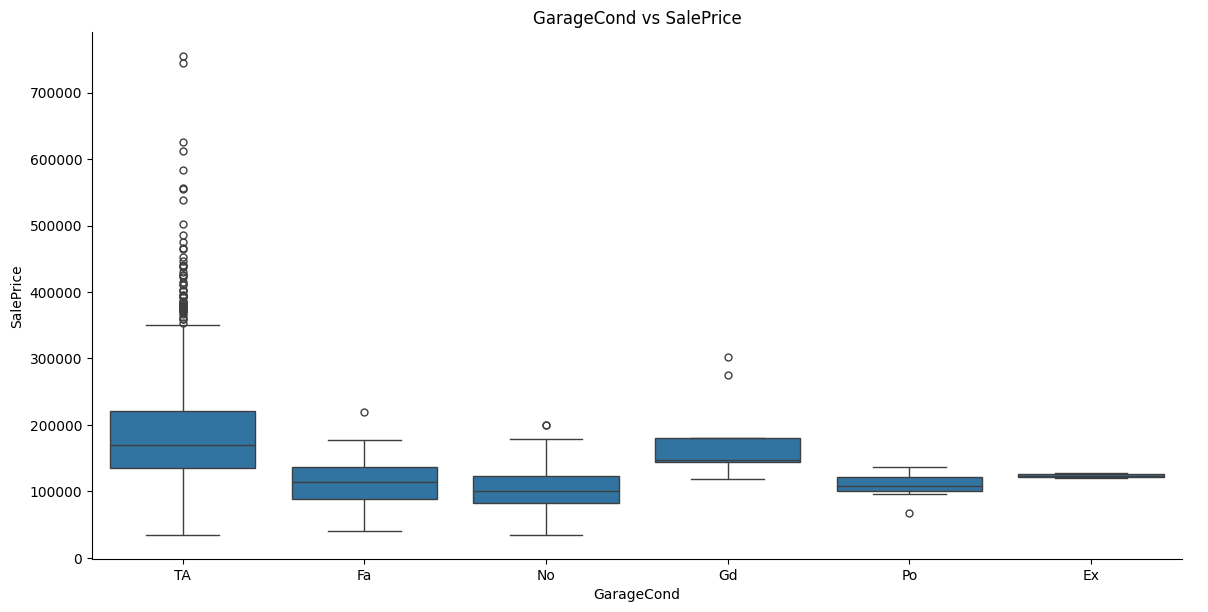

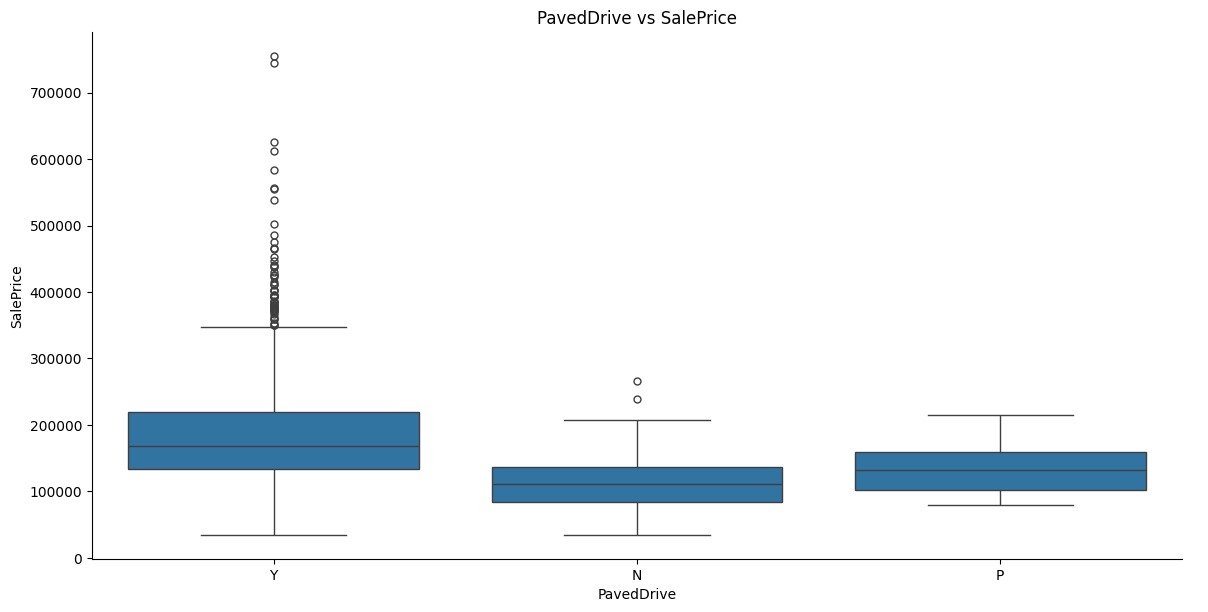

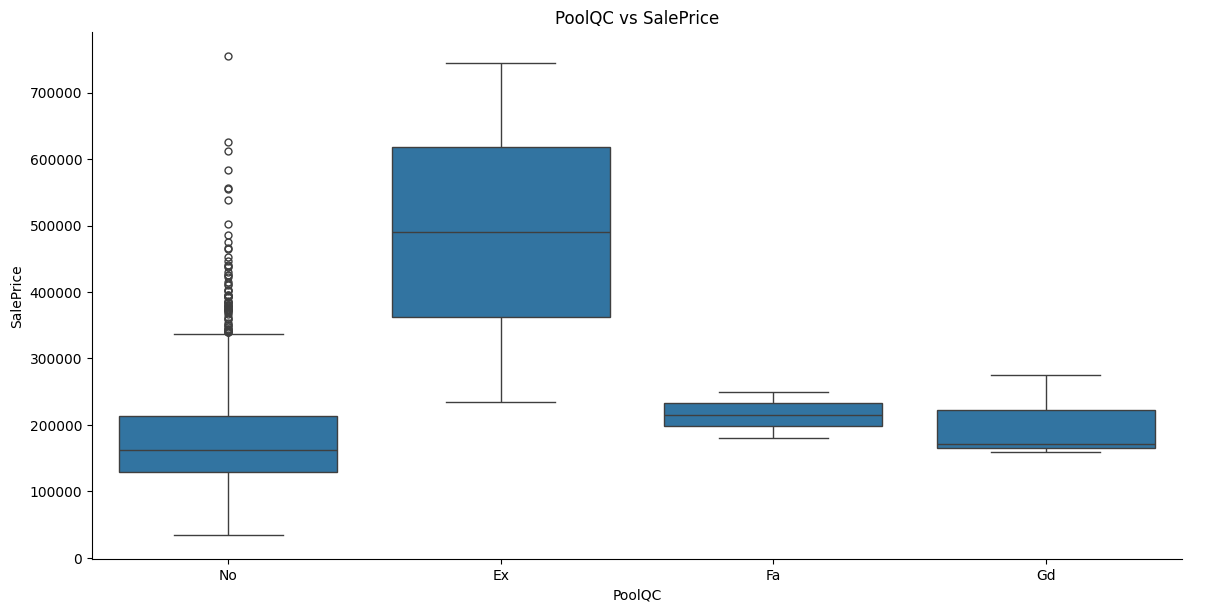

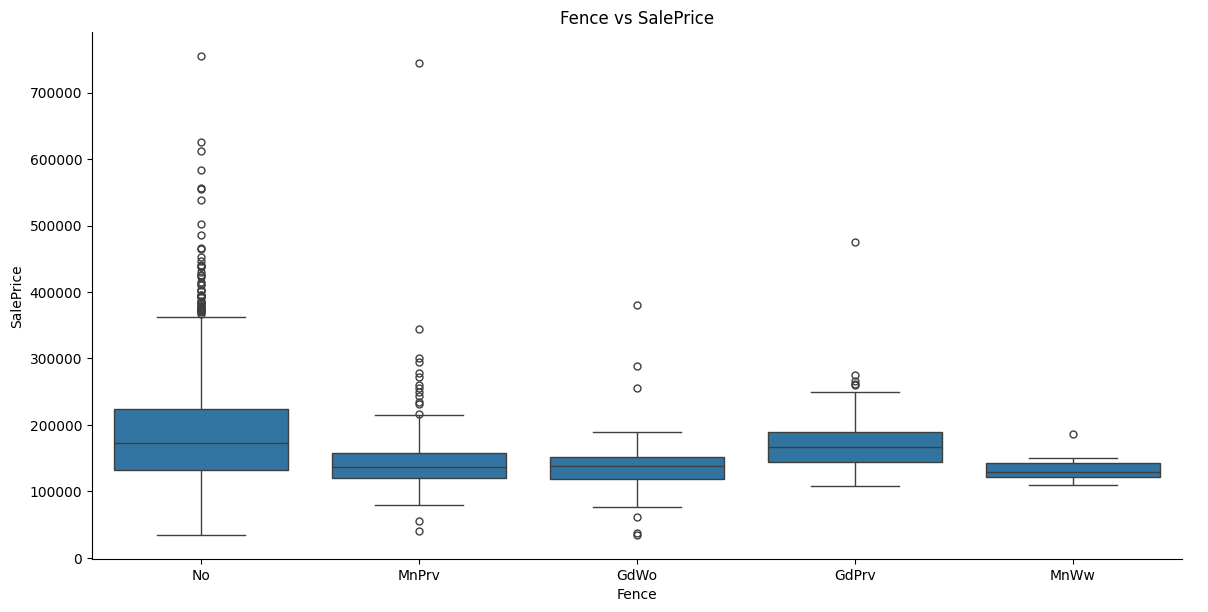

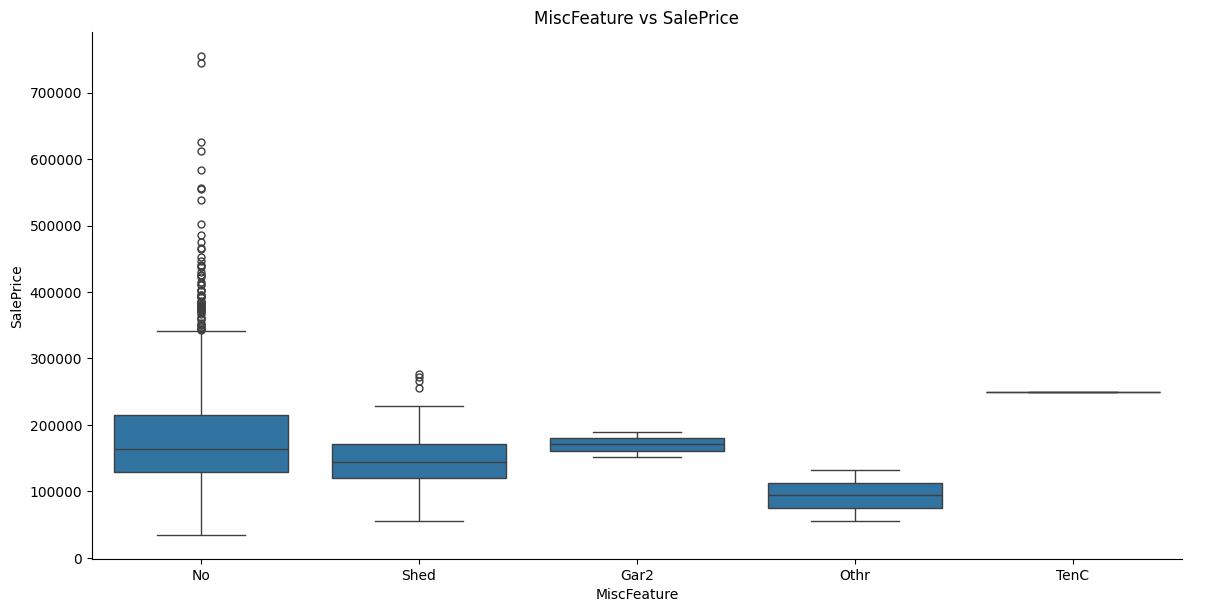

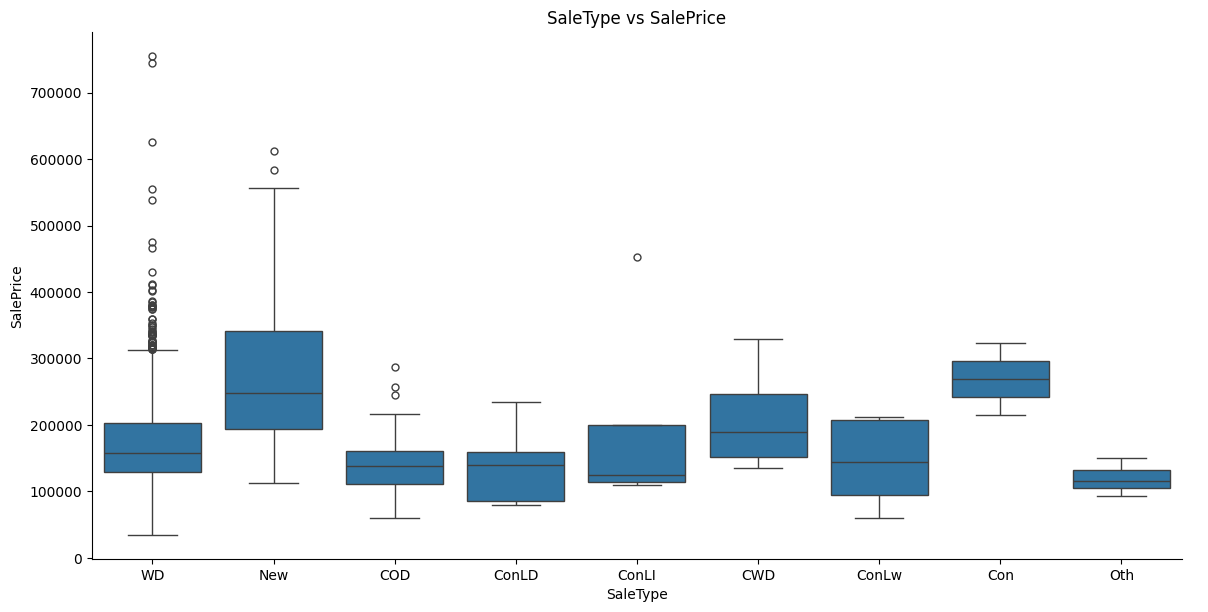

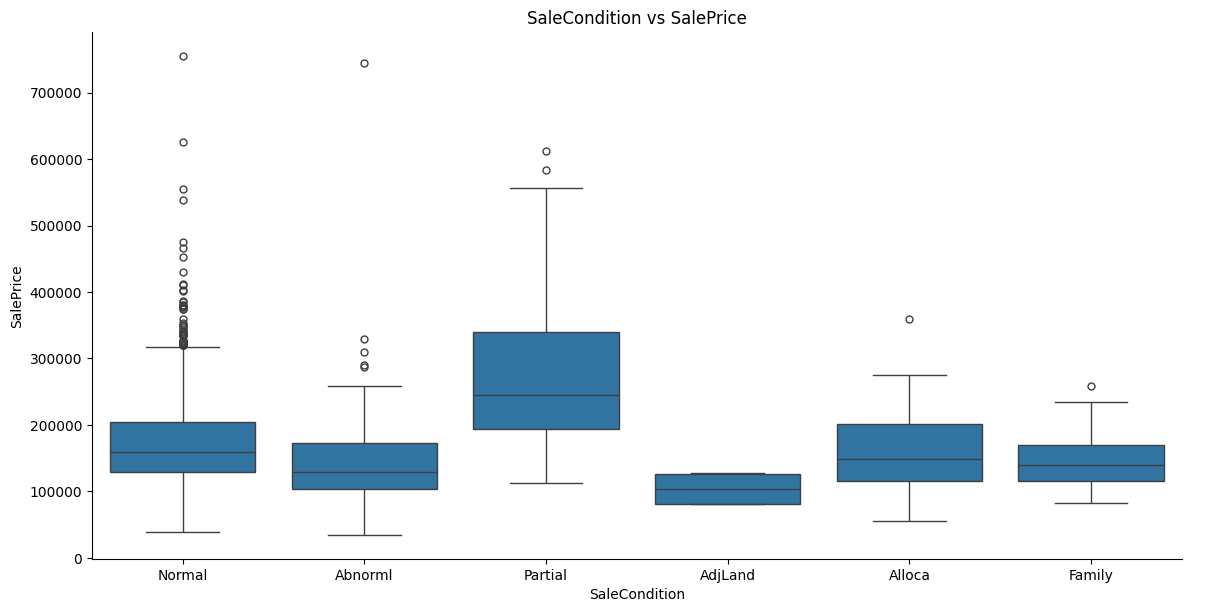

In [142]:
#Lets see in a plot whats it's value agains the price
string_columns = data_train.select_dtypes(include=['object']).columns

# Sustituir valores nulos por 'No' en esas columnas
data_train[string_columns] = data_train[string_columns].fillna("No")

# Graficar cada columna frente a SalePrice
for column in string_columns:
    sns.catplot(
        x=column,
        y="SalePrice",
        data=data_train,
        kind="box",  # Puedes cambiar a "violin" o "bar" según prefieras
        height=6,
        aspect=2,
    )
    plt.title(f"{column} vs SalePrice")
    plt.show()

In [62]:
# Por ahora vamos a pasar de quitar los elementos que sobran 
# plotDataFromColumnList(data_train, getDatasetNumericColumns(data_train))

IndexError: index 2 is out of bounds for axis 0 with size 2

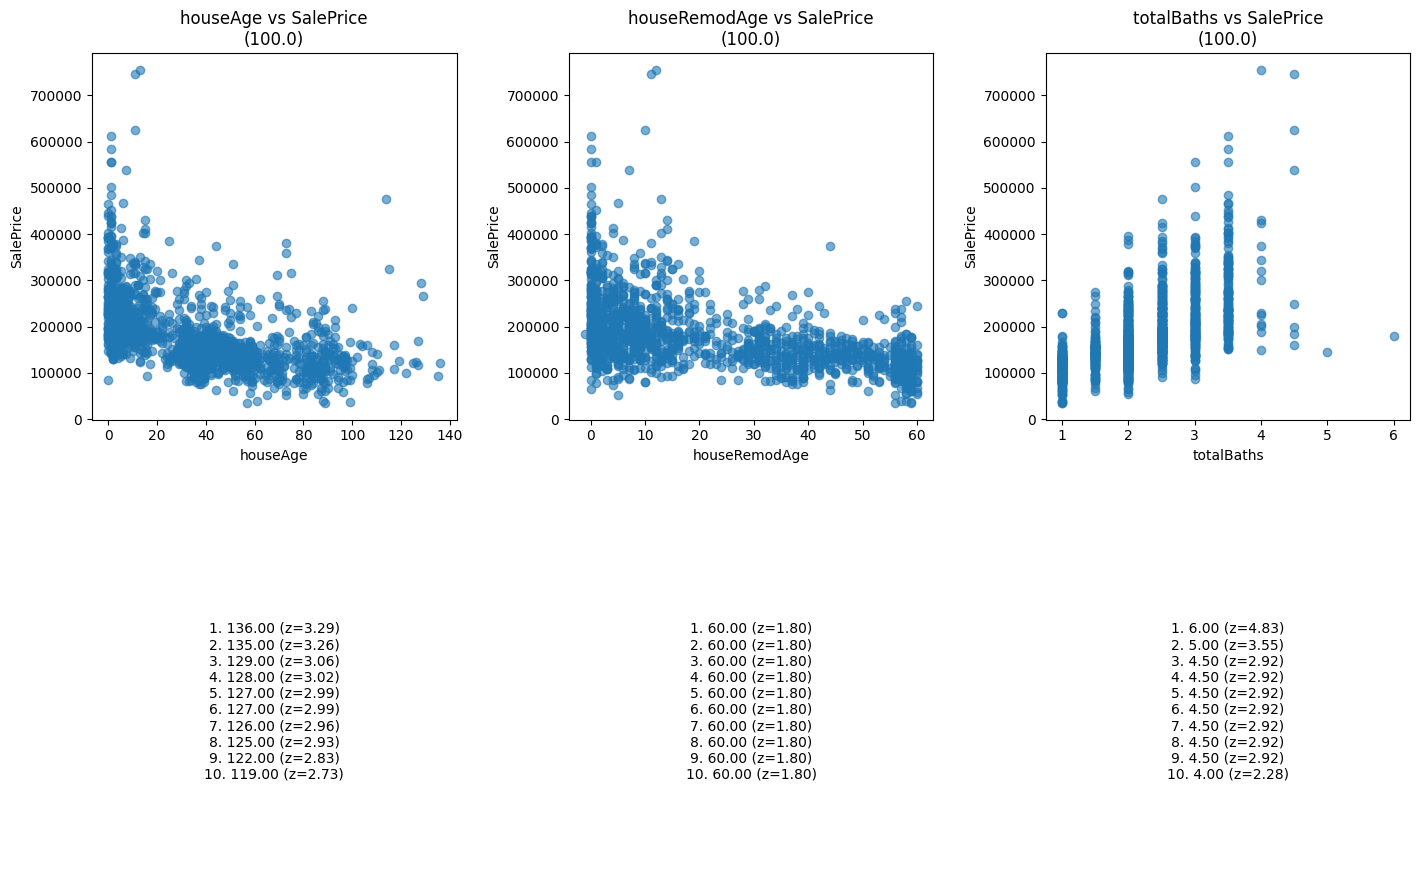

In [18]:
# plotDataFromColumnList(data_train, ['houseAge', 'houseRemodAge','totalBaths',
#                                     '1stFlrSF','2ndFlrSF','BsmtFinSF1'
#                                    ])

In [31]:
# Square feet colums have any strong correlation?
data_train_columns = data_train.select_dtypes(include=['number']).columns.tolist()
square_feet_columns = [col for col in data_train_columns if 'sf' in col.lower()]  # 'lower()' hace la búsqueda insensible a mayúsculas
print(square_feet_columns)

area_columns = [col for col in data_train_columns if 'area' in col.lower()]  # 'lower()' hace la búsqueda insensible a mayúsculas
print(area_columns)

sq_area_columns = square_feet_columns + area_columns

print(sq_area_columns)

['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'WoodDeckSF', 'OpenPorchSF']
['LotArea', 'MasVnrArea', 'GrLivArea', 'GarageArea', 'PoolArea', 'totalCoveredArea', 'porchDeckArea', 'totalArea', 'totalFinArea']
['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'WoodDeckSF', 'OpenPorchSF', 'LotArea', 'MasVnrArea', 'GrLivArea', 'GarageArea', 'PoolArea', 'totalCoveredArea', 'porchDeckArea', 'totalArea', 'totalFinArea']


In [ ]:
# Vamos a sumar algunos de los basement 

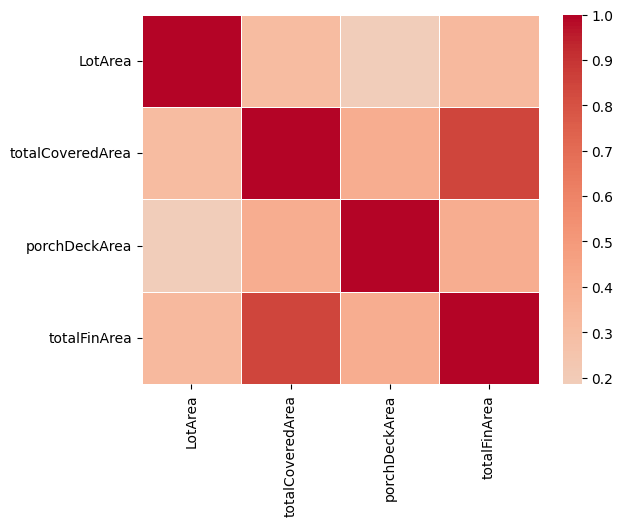

In [98]:
plot_corr_heatmap(data_train[['LotArea', 'totalCoveredArea', 'porchDeckArea', 'totalFinArea']])

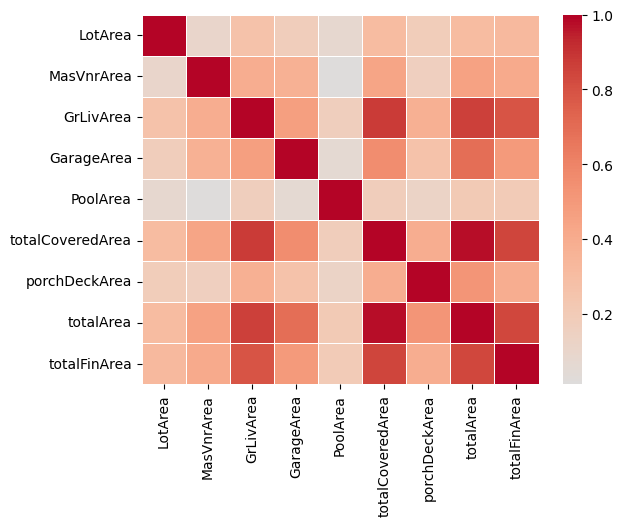

In [33]:
plot_corr_heatmap(data_train[area_columns])


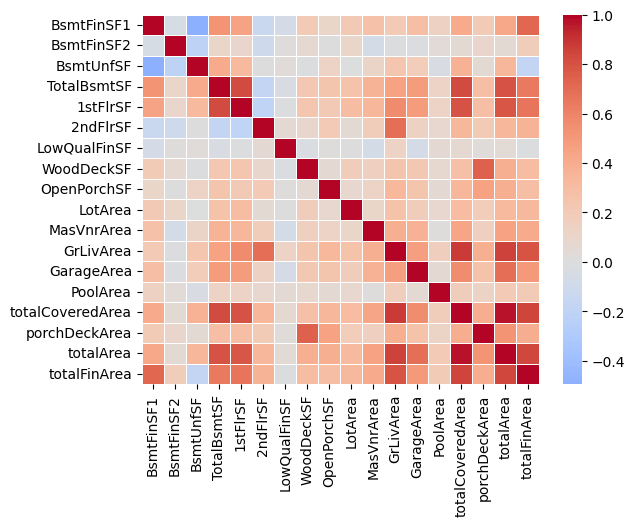

In [32]:
plot_corr_heatmap(data_train[sq_area_columns])


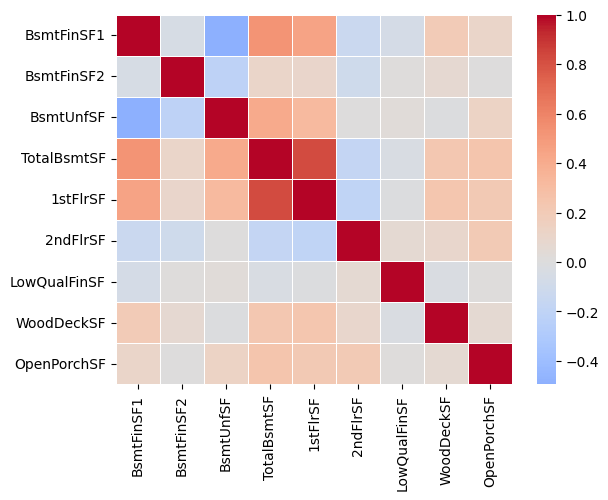

In [21]:
plot_corr_heatmap(data_train[square_feet_columns])


In [ ]:
#Eliminar las columnas utilizadas antes